In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams.update({'font.size': 14})
import matplotlib
import geopandas as gpd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
metric_crosswalk = {'daysbelow0.1year':'Low flow duration',
                    'totalannualflow':'Total annual flow',
                    'lowest7dayperyearDOY':'Min. 7-day flow date',
                    'totalbelow0.1year':'Low flow deficit',
                    'meanlowflowperiods':'Mean low flow length',
                    'maxlowflowperiods':'Max. low flow length',
                    'totallowflowperiods':'Low flow periods', 
                    'recess7': 'Recession 7-day',
                    'recess14': 'Recession 14-day',
                    'recess30': 'Recession 30-day',
                    'lowest7dayperyear':'Min. 7-day flow',
                   }
metric_crosswalk_seasonal = {'lowest7day':'Min. 7-day flow',
                            'daysbelow0.1':'Low flow duration',
                            'totalbelow0.1':'Low flow deficit'}

In [4]:
notebook_pumpscenario = 'Seasonal'

## Check out flow metrics

In [6]:
import os
annualfiles = os.listdir('../Data/data_publish/annual/')
flowmetrics_annual = ''
for f in annualfiles:
    fread = pd.read_csv('../Data/data_publish/annual/'+f)
    if len(flowmetrics_annual)==0:
        flowmetrics_annual = fread
    else:
        flowmetrics_annual = pd.concat([flowmetrics_annual,fread])
# flowmetrics_annual = pd.read_csv('../Data/updated_metrics_072022/all_sites_50_year_annual_flow_metrics_072122.csv')
flowmetrics_annual = flowmetrics_annual[flowmetrics_annual.year.isin([1,50])].drop(columns=['Unnamed: 0'])

seasonalfiles = os.listdir('../Data/data_publish/seasonal/')
flowmetrics_seasonal = ''
for f in seasonalfiles:
    fread = pd.read_csv('../Data/data_publish/seasonal/'+f)
    if len(flowmetrics_seasonal)==0:
        flowmetrics_seasonal = fread
    else:
        flowmetrics_seasonal = pd.concat([flowmetrics_seasonal,fread])
# flowmetrics_seasonal = pd.read_csv('../Data/updated_metrics_072022/all_sites_50_year_seasonal_flow_metrics_072222.csv')
flowmetrics_seasonal = flowmetrics_seasonal[flowmetrics_seasonal.year.isin([1,50])].drop(columns=['Unnamed: 0'])

In [7]:
flowmetrics_annual = flowmetrics_annual.set_index(['site','climscenario','pumpscenario','year']).sort_index().reset_index()
flowmetrics_seasonal = flowmetrics_seasonal.set_index(['site','climscenario','pumpscenario','year']).sort_index().reset_index()

In [8]:
setindex = flowmetrics_annual.set_index(['site','climscenario','pumpscenario']).drop(columns=['col'])
flow_annual_abschanges = (setindex[setindex.year==50]-setindex[setindex.year==1])
flow_annual_starts = setindex[setindex.year==1]

setindex = flowmetrics_seasonal.set_index(['site','climscenario','pumpscenario','season']).drop(columns=['col'])
flow_seasonal_abschanges = (setindex[setindex.year==50]-setindex[setindex.year==1])
flow_seasonal_starts = setindex[setindex.year==1]

In [9]:
flowmetric_annual_stdev = (flow_annual_abschanges/flow_annual_starts).reset_index().groupby(['site','climscenario','pumpscenario']).std()
flowmetric_annual_mean = (flow_annual_abschanges.abs()/flow_annual_starts.abs()).reset_index().groupby(['site','climscenario','pumpscenario']).median()
flowmetric_annual_mean = (flow_annual_abschanges.abs()/flow_annual_starts.abs()).reset_index().groupby(['site','climscenario','pumpscenario']).median()
flowmetric_annual_min = (flow_annual_abschanges.abs()/flow_annual_starts.abs()).reset_index().groupby(['site','climscenario','pumpscenario']).min()
flowmetric_annual_max = (flow_annual_abschanges.abs()/flow_annual_starts.abs()).reset_index().groupby(['site','climscenario','pumpscenario']).max()
flowmetric_annual_p25 = (flow_annual_abschanges.abs()/flow_annual_starts.abs()).reset_index().groupby(['site','climscenario','pumpscenario']).quantile(0.25)
flowmetric_annual_p75 = (flow_annual_abschanges.abs()/flow_annual_starts.abs()).reset_index().groupby(['site','climscenario','pumpscenario']).quantile(0.75)
flowmetric_annual_cv = flowmetric_annual_stdev/flowmetric_annual_mean

flowmetric_seasonal_stdev = (flow_seasonal_abschanges.abs()/flow_seasonal_starts).reset_index().groupby(['site','climscenario','pumpscenario','season',]).std()
flowmetric_seasonal_mean = (flow_seasonal_abschanges.abs()/flow_seasonal_starts.abs()).reset_index().groupby(['site','climscenario','pumpscenario','season',]).quantile(.5)
flowmetric_seasonal_min = (flow_seasonal_abschanges.abs()/flow_seasonal_starts.abs()).reset_index().groupby(['site','climscenario','pumpscenario','season']).min()
flowmetric_seasonal_max = (flow_seasonal_abschanges.abs()/flow_seasonal_starts.abs()).reset_index().groupby(['site','climscenario','pumpscenario','season']).max()
flowmetric_seasonal_p25 = (flow_seasonal_abschanges.abs()/flow_seasonal_starts.abs()).reset_index().groupby(['site','climscenario','pumpscenario','season']).quantile(0.25)
flowmetric_seasonal_p75 = (flow_seasonal_abschanges.abs()/flow_seasonal_starts.abs()).reset_index().groupby(['site','climscenario','pumpscenario','season']).quantile(0.75)
flowmetric_seasonal_cv = flowmetric_seasonal_stdev/flowmetric_seasonal_mean



Dry totalannualflow 1.3953488372093024
Dry lowest7dayperyear 35.348837209302324
Dry lowest7dayperyearDOY 0.9302325581395349
Dry daysbelow0.1year 90.23255813953487
Dry totalbelow0.1year 95.81395348837209
Dry totallowflowperiods 69.76744186046511
Dry meanlowflowperiods 88.37209302325581
Dry maxlowflowperiods 85.11627906976744
Dry recess7 33.02325581395349
Dry recess14 32.55813953488372
Dry recess30 32.55813953488372
Avg totalannualflow 0.0
Avg lowest7dayperyear 14.418604651162791
Avg lowest7dayperyearDOY 0.46511627906976744
Avg daysbelow0.1year 74.88372093023256
Avg totalbelow0.1year 90.69767441860465
Avg totallowflowperiods 56.74418604651162
Avg meanlowflowperiods 80.46511627906978
Avg maxlowflowperiods 74.4186046511628
Avg recess7 15.813953488372093
Avg recess14 13.953488372093023
Avg recess30 14.883720930232558
Wet totalannualflow 0.0
Wet lowest7dayperyear 6.511627906976744
Wet lowest7dayperyearDOY 0.46511627906976744
Wet daysbelow0.1year 34.883720930232556
Wet totalbelow0.1year 55.34

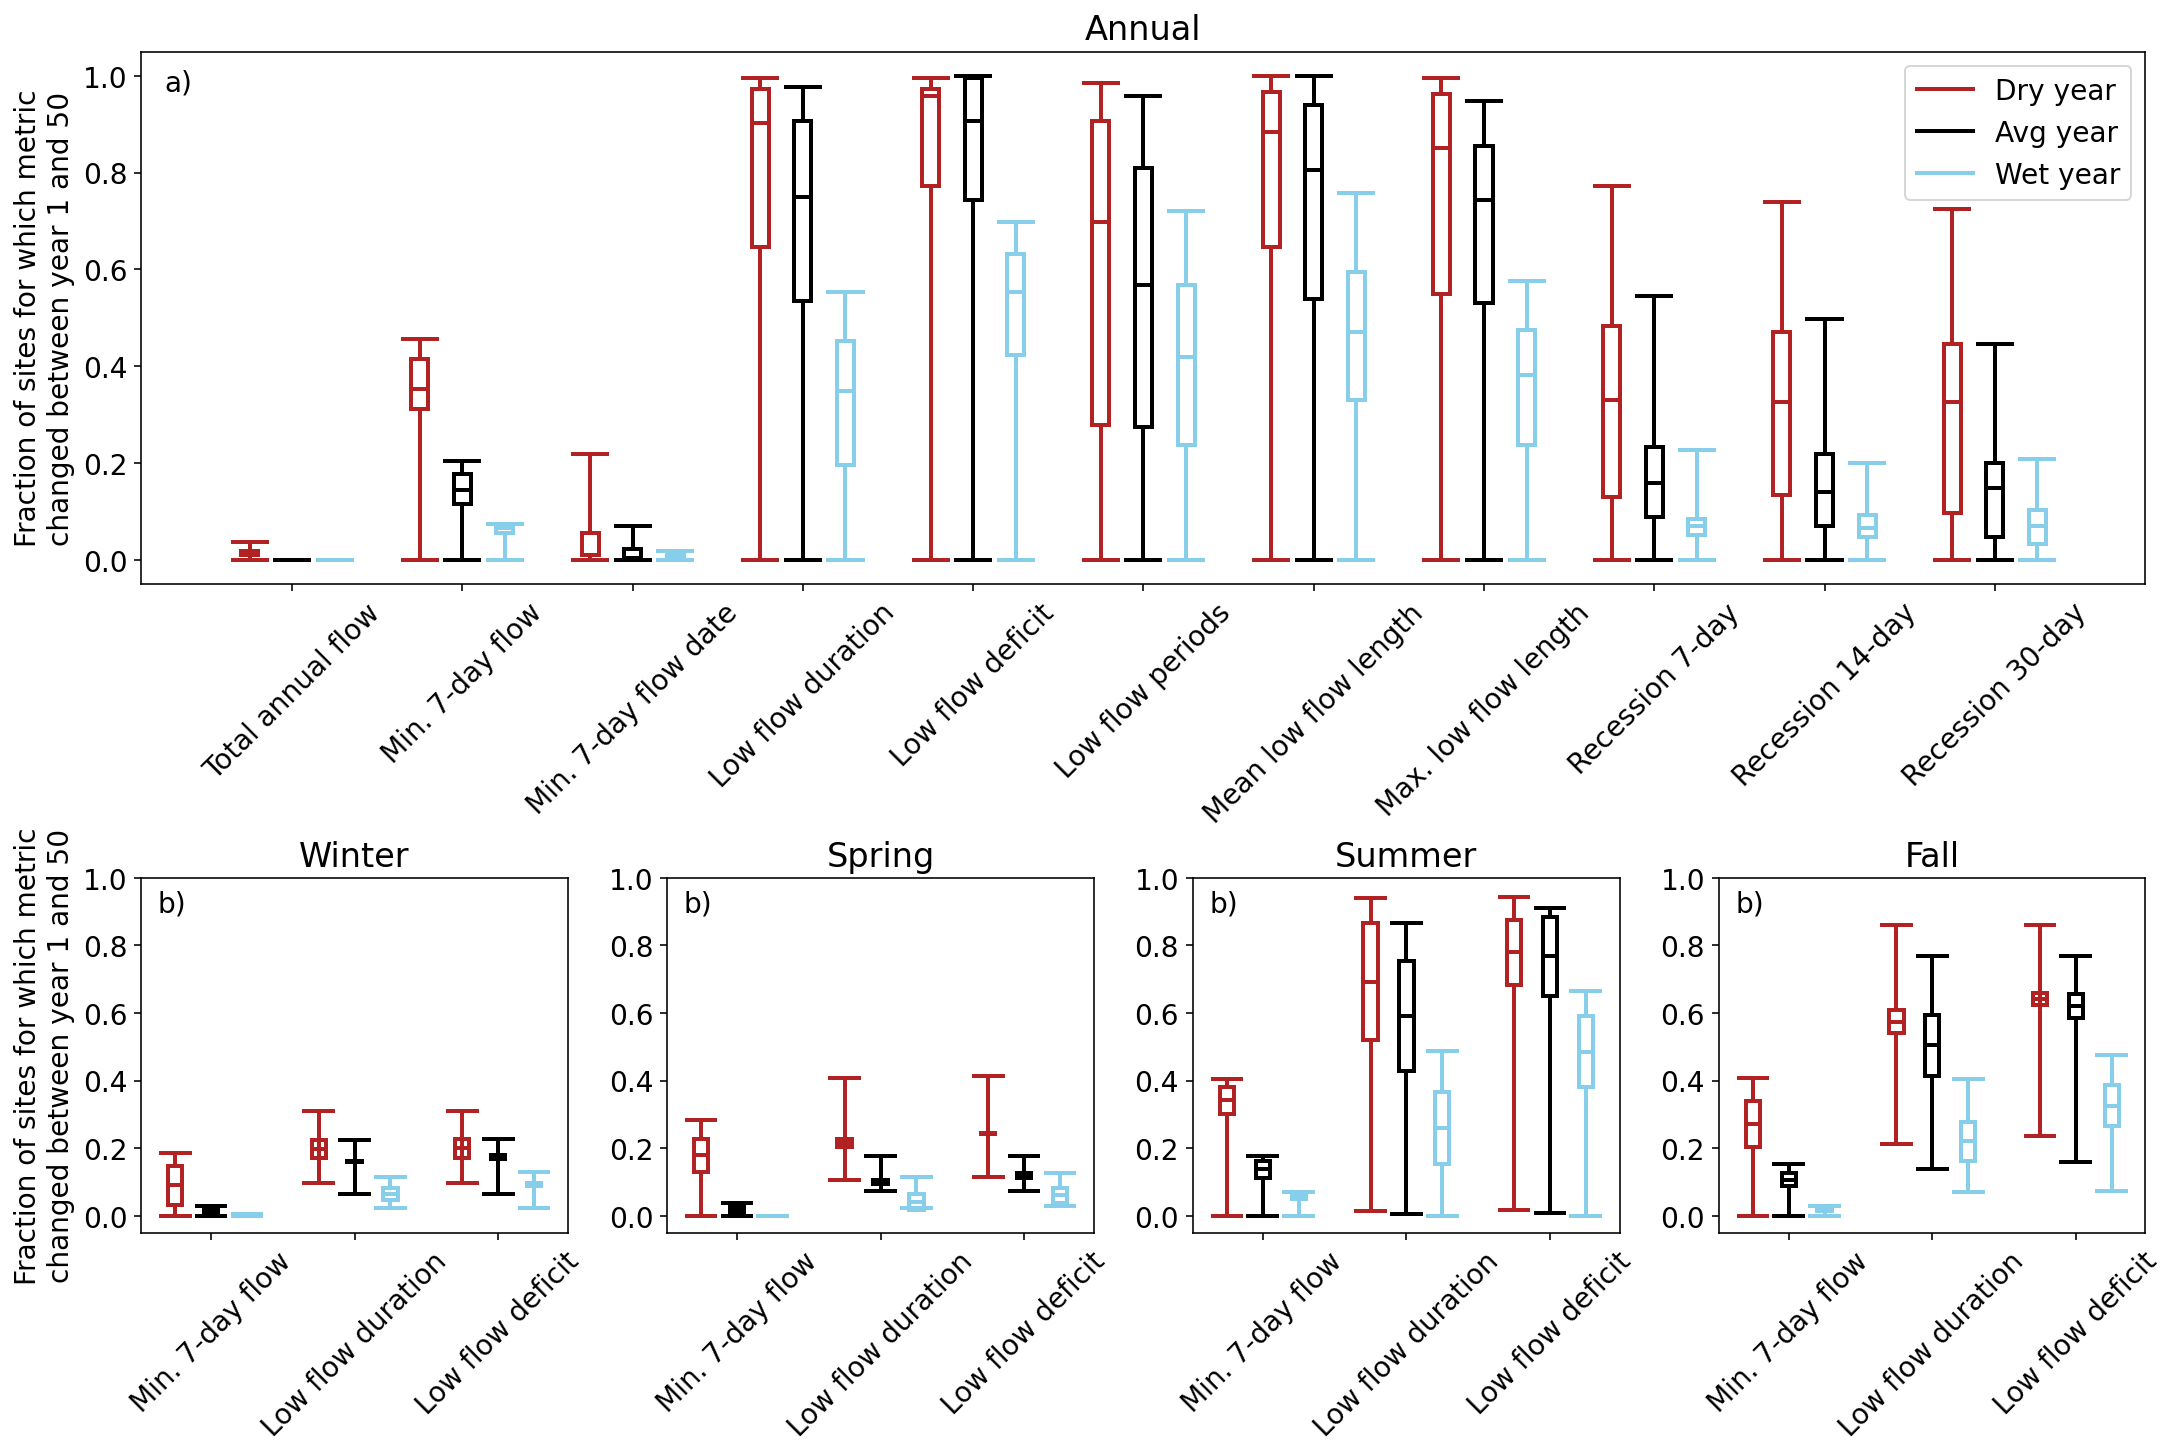

In [10]:
# # number of sites for which each indicator changes by 10% by year 50
# # number of indicators that change by by year 50 at each site

change_thresh = 0.2 # % difference between year 1 and 50

mean_change = metric_mean = flowmetric_annual_mean.drop(columns='year')
metric_min = flowmetric_annual_min.drop(columns='year')
metric_max = flowmetric_annual_max.drop(columns='year')
metric_p25 = flowmetric_annual_p25.drop(columns='year')
metric_p75 = flowmetric_annual_p75.drop(columns='year')
metric_list = mean_change.columns

metric_mean_seasonal = flowmetric_seasonal_mean.drop(columns='year')
metric_min_seasonal = flowmetric_seasonal_min.drop(columns='year')
metric_max_seasonal = flowmetric_seasonal_max.drop(columns='year')
metric_p25_seasonal = flowmetric_seasonal_p25.drop(columns='year')
metric_p75_seasonal = flowmetric_seasonal_p75.drop(columns='year')
metric_stdev_seasonal = flowmetric_seasonal_stdev.drop(columns='year')
metric_list_seasonalQ = metric_mean_seasonal.columns

dropmetric = [
#     'totalannualflow',
              'totallowflows','zeroflowcounts']#['recess30','recess14','slope14','slope30',
#              'lowest7dayperyearDOY','daysbelow0.1year']
metric_list = [m for m in metric_list if m not in dropmetric]

fig = plt.figure(figsize=(15,10), constrained_layout=True)
spec = fig.add_gridspec(ncols=4, nrows=5)

ax0 = fig.add_subplot(spec[0:3,:])
ax1 = fig.add_subplot(spec[3:, 0])
ax2 = fig.add_subplot(spec[3:, 1])
ax3 = fig.add_subplot(spec[3:, 2])
ax4 = fig.add_subplot(spec[3:, 3])
axs = [ax1,ax2,ax3,ax4]

bins = np.linspace(0,15,12)
i=0
p = notebook_pumpscenario
addsum = {'Dry':0,
          'Avg':0.25,
         'Wet':0.5}
colors = {'Dry':'firebrick',
          'Avg':'k',
         'Wet':'skyblue'}


for clim in ['Dry','Avg','Wet']:
    j=0+addsum[clim]
    c = colors[clim]

    subset = metric_mean.reset_index()[(metric_mean.reset_index().pumpscenario==p)&
                        (metric_mean.reset_index().climscenario==clim)]
    subset_min = metric_min.reset_index()[(metric_min.reset_index().pumpscenario==p)&
                        (metric_min.reset_index().climscenario==clim)] 
    subset_max = metric_max.reset_index()[(metric_max.reset_index().pumpscenario==p)&
                        (metric_max.reset_index().climscenario==clim)] 
    subset_p25 = metric_p25.reset_index()[(metric_p25.reset_index().pumpscenario==p)&
                        (metric_p25.reset_index().climscenario==clim)] 
    subset_p75 = metric_p75.reset_index()[(metric_mean.reset_index().pumpscenario==p)&
                        (metric_p75.reset_index().climscenario==clim)] 

    for metric in metric_list:
        if 'slope' in metric:
            continue
        else:
            ax = ax0
            mchange = len(subset[subset[metric].abs()>change_thresh])/len(subset)
            ax.plot([j-0.05,j+0.05],[mchange,mchange],
                   c=c,lw=2,clip_on=False)
            m25 = len(subset_p25[subset_p25[metric].abs()>change_thresh])/len(subset_p25)
            ax.plot([j-0.05,j+0.05],[m25,m25],
                   c=c,lw=2,clip_on=False)
            m75 = len(subset_p75[subset_p75[metric].abs()>change_thresh])/len(subset_p75)
            ax.plot([j-0.05,j+0.05],[m75,m75],
                   c=c,lw=2,clip_on=False)
            mupchange = len(subset_max[subset_max[metric].abs()>change_thresh])/len(subset_max)
            ax.plot([j-0.1,j+0.1],[mupchange]*2,
                       lw=2,c=c,clip_on=False)
            mdownchange = len(subset_min[subset_min[metric].abs()>change_thresh])/len(subset_max)
            ax.plot([j-0.1,j+0.1],[mdownchange]*2,
                   lw=2,c=c,clip_on=False)
            ax.plot([j,j],[mupchange,m75],
                   lw=2,c=c,clip_on=False)
            ax.plot([j,j],[mdownchange,m25],
                   lw=2,c=c,clip_on=False)
            ax.plot([j-.05]*2,[m25,m75],
                   lw=2,c=c)
            ax.plot([j+.05]*2,[m25,m75],
                   lw=2,c=c)
#             ax.set_ylabel('Fraction of sites for which metric\nchanged between year 1 and 50')

            print(clim,metric,len(subset[subset[metric]>0.2])/len(subset)*100)
            

        j+=1
    i+=1
i=0
for clim in colors.keys():
    ax.plot([0,1],[2,2],zorder = -1,label=clim+' year',
           c = colors[clim],lw=2)
ax.set_ylim(-0.05,1.05)
ax.set_ylabel('Fraction of sites for which metric\nchanged between year 1 and 50')
ax.legend()
ax.set_xticks([t+0.25 for t in list(range(len(metric_list)-3))])
ax.set_xticklabels([ metric_crosswalk[m] for m in metric_list if not ('slope' in m)],
                   rotation = 45)
ax.set_title('Annual')


droplist_seasonal = [
    'totalseasonalflow',
                    'lowest7dayperseasonDOY',
                     'zeroflowcountsseasonal'
                    ]
metric_list_use = [m for m in metric_list_seasonalQ if m not in droplist_seasonal]
seasons = ['winter','spring','summer','fall']
season_titles = ['Winter','Spring','Summer','Fall']

for k in range(len(seasons)):
    ax = axs[k]
    i=0
    p = notebook_pumpscenario

    for clim in ['Dry','Avg','Wet']:
        j=0+addsum[clim]
        c = colors[clim]

        for metric in metric_list_use:
            subset = metric_mean_seasonal.reset_index()[(metric_mean_seasonal.reset_index().pumpscenario==p)&
                            (metric_mean_seasonal.reset_index().climscenario==clim) &
                                                       (metric_mean_seasonal.reset_index().season==seasons[k])]
            subset_min = metric_min_seasonal.reset_index()[(metric_min_seasonal.reset_index().pumpscenario==p)&
                                (metric_min_seasonal.reset_index().climscenario==clim)&
                                                       (metric_min_seasonal.reset_index().season==seasons[k])] 
            subset_max = metric_max_seasonal.reset_index()[(metric_max_seasonal.reset_index().pumpscenario==p)&
                                (metric_max_seasonal.reset_index().climscenario==clim)&
                                                       (metric_max_seasonal.reset_index().season==seasons[k])] 
            subset_p25 = metric_p25_seasonal.reset_index()[(metric_p25_seasonal.reset_index().pumpscenario==p)&
                                (metric_p25_seasonal.reset_index().climscenario==clim)&
                                                       (metric_p25_seasonal.reset_index().season==seasons[k])] 
            subset_p75 = metric_p75_seasonal.reset_index()[(metric_p75_seasonal.reset_index().pumpscenario==p)&
                                (metric_p75_seasonal.reset_index().climscenario==clim)&
                                                       (metric_p75_seasonal.reset_index().season==seasons[k])] 
            
            
            m25 = len(subset_p25[subset_p25[metric].abs()>change_thresh])/len(subset_p25)
            ax.plot([j-0.05,j+0.05],[m25,m25],
                   c=c,lw=2,clip_on=False)
            m75 = len(subset_p75[subset_p75[metric].abs()>change_thresh])/len(subset_p75)
            ax.plot([j-0.05,j+0.05],[m75,m75],
                   c=c,lw=2,clip_on=False)
            mupchange = len(subset_max[subset_max[metric].abs()>change_thresh])/len(subset_max)
            ax.plot([j-0.1,j+0.1],[mupchange]*2,
                       lw=2,c=c,clip_on=False)
            mdownchange = len(subset_min[subset_min[metric].abs()>change_thresh])/len(subset_max)
            ax.plot([j-0.1,j+0.1],[mdownchange]*2,
                   lw=2,c=c,clip_on=False)
            ax.plot([j,j],[mupchange,m75],
                   lw=2,c=c,clip_on=False)
            ax.plot([j,j],[mdownchange,m25],
                   lw=2,c=c,clip_on=False)
            ax.plot([j-.05]*2,[m25,m75],
                   lw=2,c=c)
            ax.plot([j+.05]*2,[m25,m75],
                   lw=2,c=c)
            
            
            mchange = np.nanmean([m25,m75])
            ax.plot([j-0.05,j+0.05],[mchange,mchange],
                   c=c,lw=2,clip_on=False)
            
            ax.set_ylabel('Fraction of sites for which metric\nchanged between year 1 and 50')

            j+=1
        i+=1
    ax.set_title(season_titles[k])

for ax in axs:
#     ax.set_xlabel('Metric')
    ax.set_xticks([l+0.25 for l in [0,1,2,]])
    ax.set_xticklabels([metric_crosswalk_seasonal[m.replace('perseason','').replace('seasonal','')] 
                        for m in metric_list_use],rotation = 45)
    ax.set_ylim(-0.05,1)
for ax in [axs[1],axs[2],axs[3]]:
    ax.set_ylabel('')
    
ax0.text(-0.5,.97,'a)')
labels = ['b)','c)','d)','e)']
i=0
for ax in axs:
    ax.text(-0.12,0.9,labels[i])


    
plt.savefig('../Figures/streamflow_metric_change_'+notebook_pumpscenario+'.png',format='png',
            bbox_inches='tight')

In [11]:
fmean = flowmetric_annual_mean.reset_index()
fmean = fmean.drop(columns=['year',]).set_index('site')
fmean_seasonal = flowmetric_seasonal_mean.reset_index()
fmean_seasonal = fmean_seasonal.drop(columns=['year',]).set_index('site')

correlates = fmean

for season in ['winter','spring','summer','fall']:
    fmean_season = fmean_seasonal[fmean_seasonal.season==season].drop(columns='season').drop(columns=['climscenario',
                                                                                              'pumpscenario'])
    fmean_season = fmean_season.rename(columns={col:season+'_'+col
                                               for col in fmean_season.columns})
    for col in fmean_season:
        correlates[col] = fmean_season[col]
    

    
    
fmean25 = flowmetric_annual_p25.reset_index()
fmean25 = fmean25.drop(columns=['year',]).set_index('site')
fmean25_seasonal = flowmetric_seasonal_p25.reset_index()
fmean25_seasonal = fmean25_seasonal.drop(columns=['year',]).set_index('site')

correlates_p25 = fmean25

for season in ['winter','spring','summer','fall']:
    fmean25_season = fmean25_seasonal[fmean25_seasonal.season==season].drop(columns='season').drop(columns=['climscenario',
                                                                                              'pumpscenario'])
    fmean25_season = fmean25_season.rename(columns={col:season+'_'+col
                                               for col in fmean25_season.columns})
    for col in fmean25_season:
        correlates_p25[col] = fmean25_season[col]
    

    
    
    
fmean75 = flowmetric_annual_p75.reset_index()
fmean75 = fmean75.drop(columns=['year',]).set_index('site')
fmean75_seasonal = flowmetric_seasonal_p75.reset_index()
fmean75_seasonal = fmean75_seasonal.drop(columns=['year',]).set_index('site')

correlates_p75 = fmean75

for season in ['winter','spring','summer','fall']:
    fmean75_season = fmean75_seasonal[fmean75_seasonal.season==season].drop(columns='season').drop(columns=['climscenario',
                                                                                              'pumpscenario'])
    fmean75_season = fmean75_season.rename(columns={col:season+'_'+col
                                               for col in fmean75_season.columns})
    for col in fmean75_season:
        correlates_p75[col] = fmean75_season[col]

In [12]:
metrics_all = [
               'daysbelow0.1year','totalbelow0.1year',
         'meanlowflowperiods','maxlowflowperiods',
    'fall_totalbelow0.1seasonal',
         'fall_daysbelow0.1seasonal',
              'summer_daysbelow0.1seasonal', 
          'summer_totalbelow0.1seasonal',
    'recess7','recess14','recess30',
         'lowest7dayperyear',
               'summer_lowest7dayperseason',
    'fall_lowest7dayperseason',
          'spring_daysbelow0.1seasonal', 
          'spring_totalbelow0.1seasonal' ,
             
              'winter_daysbelow0.1seasonal',
         'winter_totalbelow0.1seasonal',
            
              ]


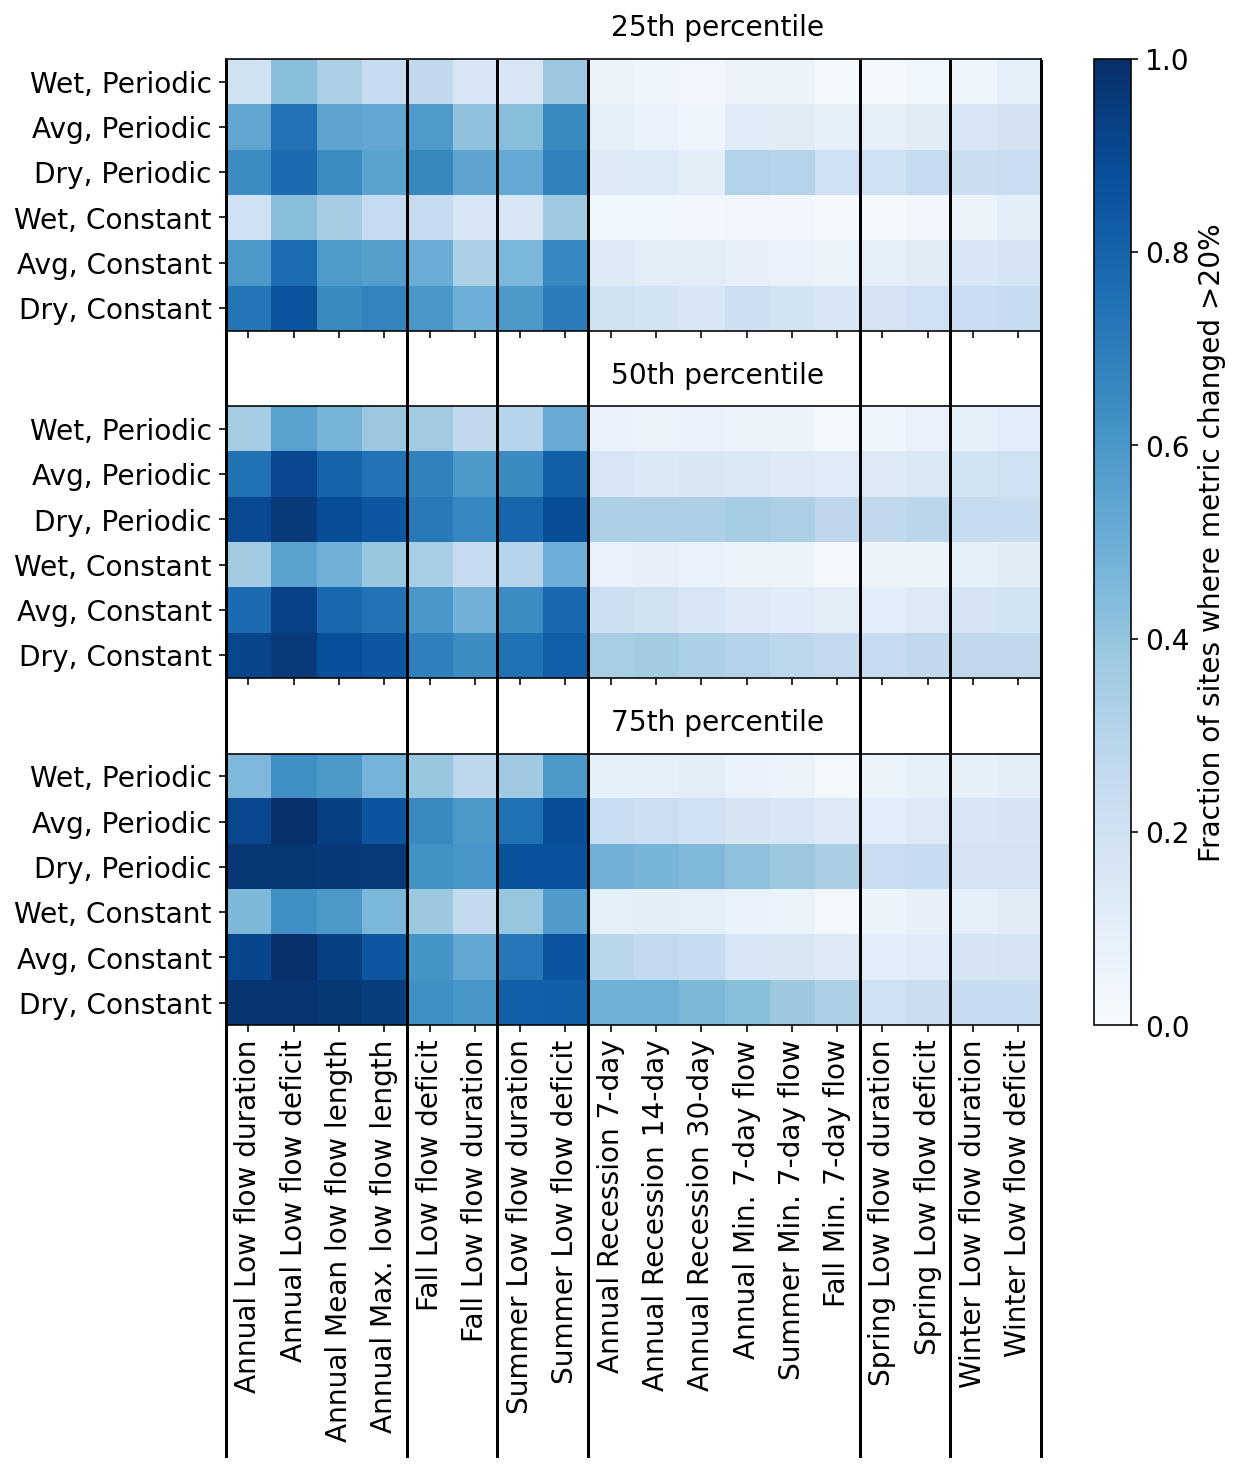

In [13]:
# make heatmaps of metric impacts


climscenarios = ['Dry','Avg','Wet']
pumpsims = ['Constant','Seasonal']
scenarios = [c+', '+p for p in pumpsims for c in climscenarios]

def frac_change_annual(metric ,sim, df, change_thresh):
    p = sim.split(', ')
    c = p[0]
    p = p[1]
    subset = df.reset_index()[(df.reset_index().pumpscenario==p)&
                        (df.reset_index().climscenario==c)]
    mchange = len(subset[subset[metric].abs()>change_thresh])/len(subset)
    return mchange




change_thresh = 0.2

fig = plt.figure(figsize=(8.5,10), constrained_layout=True)
spec = fig.add_gridspec(ncols=25, nrows=3)

cax = fig.add_subplot(spec[:,24])
ax0 = fig.add_subplot(spec[0,:24])
ax1 = fig.add_subplot(spec[1,:24])
ax2 = fig.add_subplot(spec[2,:24])

axx = axs = [ax0,
      ax1,
      ax2,]


dfs = [correlates_p25,
      correlates,
      correlates_p75]

X, Y = np.meshgrid(metrics_all, scenarios)

for k in range(len(dfs)):
    ax = axx[k]
    Z = np.array([np.array([frac_change_annual(X[i][j],Y[i][j],
                                               dfs[k],change_thresh) 
                            for j in range(len(Y[0]))])
                for i in range(len(Y))])

    im = ax.imshow(Z,vmin=0,vmax=1,cmap='Blues')
    
for i in range(3):
    ax = axs[i]
    ax.set_xticks(list(range(len(metrics_all))))
    ax.set_xticklabels([])
    ax.set_yticks(list(range(len(scenarios))))
    ax.set_yticklabels([l.replace('Seasonal','Periodic') for l in scenarios])
    ax.set_ylim(-.5,5.5)
    ax.set_xlim(-.5,17.5)
    


cbar = plt.colorbar(im,cax=cax)
cbar.set_label('Fraction of sites where metric changed >20%')
metric_labels = []
for i in range(len(metrics_all)):
    try:
        metric_labels.append('Annual '+metric_crosswalk[metrics_all[i]])
    except:
        season = str(metrics_all[i]).split('_')
        metric = season[1].replace('perseason','').replace('seasonal','')
        season = season[0].capitalize()
        metric_labels.append(season+' '+metric_crosswalk_seasonal[metric])
axs[2].set_xticklabels(metric_labels,
                       rotation=90)


ax0.text(8,6,'25th percentile',
         fontsize = 14)
ax1.text(8,6,'50th percentile',
          fontsize = 14)
ax2.text(8,6,'75th percentile',
         fontsize = 14)

for xv in [-.5,3.5,5.5,7.5,13.5,15.5,17.5]:
    axs[2].plot([xv]*2,[-10.,20.8],c='k',
       clip_on=False)



plt.savefig('../Figures/heatmaps_streamflow_reorder.png',format='png',dpi=300,bbox_inches='tight')

In [14]:
cwet = correlates[correlates.climscenario=='Wet'].drop(columns='climscenario').reset_index().set_index(['site','pumpscenario'])
cdry = correlates[correlates.climscenario=='Dry'].drop(columns='climscenario').reset_index().set_index(['site','pumpscenario'])

change_indices = {}
change_sites = {}
for col in cwet.columns:
    cc = cwet[col]
    cd = cdry[col]
    cc = cc[(cc<change_thresh) &
            (cd>=change_thresh)].index.values
    change_indices[col] = cc
    
    cc1 = cwet[[col]].reset_index().set_index('site')
    cd1 = cdry[col].reset_index().set_index('site')
    cd1 = cd1[cd1.pumpscenario==notebook_pumpscenario]
    cc1m = cc1[(cc1.pumpscenario==notebook_pumpscenario)]
    change_sites[col] =  cc1[(cc1[col]<change_thresh) & (cd1[col]>=change_thresh)].index.drop_duplicates().values

for key in change_sites.keys():
    print(key,len(change_sites[key]))

totalannualflow 3
lowest7dayperyear 62
lowest7dayperyearDOY 2
daysbelow0.1year 120
zeroflowcounts 0
totalbelow0.1year 89
totallowflowperiods 93
meanlowflowperiods 100
maxlowflowperiods 109
slope7 14
slope14 24
slope30 21
recess7 55
recess14 55
recess30 55
winter_totalseasonalflow 9
winter_lowest7dayperseason 17
winter_lowest7dayperseasonDOY 5
winter_daysbelow0.1seasonal 9
winter_zeroflowcountsseasonal 0
winter_totalbelow0.1seasonal 3
spring_totalseasonalflow 3
spring_lowest7dayperseason 43
spring_lowest7dayperseasonDOY 1
spring_daysbelow0.1seasonal 9
spring_zeroflowcountsseasonal 0
spring_totalbelow0.1seasonal 9
summer_totalseasonalflow 42
summer_lowest7dayperseason 59
summer_lowest7dayperseasonDOY 0
summer_daysbelow0.1seasonal 105
summer_zeroflowcountsseasonal 0
summer_totalbelow0.1seasonal 77
fall_totalseasonalflow 12
fall_lowest7dayperseason 56
fall_lowest7dayperseasonDOY 0
fall_daysbelow0.1seasonal 57
fall_zeroflowcountsseasonal 0
fall_totalbelow0.1seasonal 45


In [15]:
gagesII = gpd.read_file('../Data/gagesII_data_and_subsets/gagesII.shp')
gagesII['site'] = gagesII.STAID.astype('int')
state_outline = gpd.read_file('../Data/maps_and_boundaries/US_state_outline/cb_2018_us_state_500k.shp').to_crs(epsg=4326)


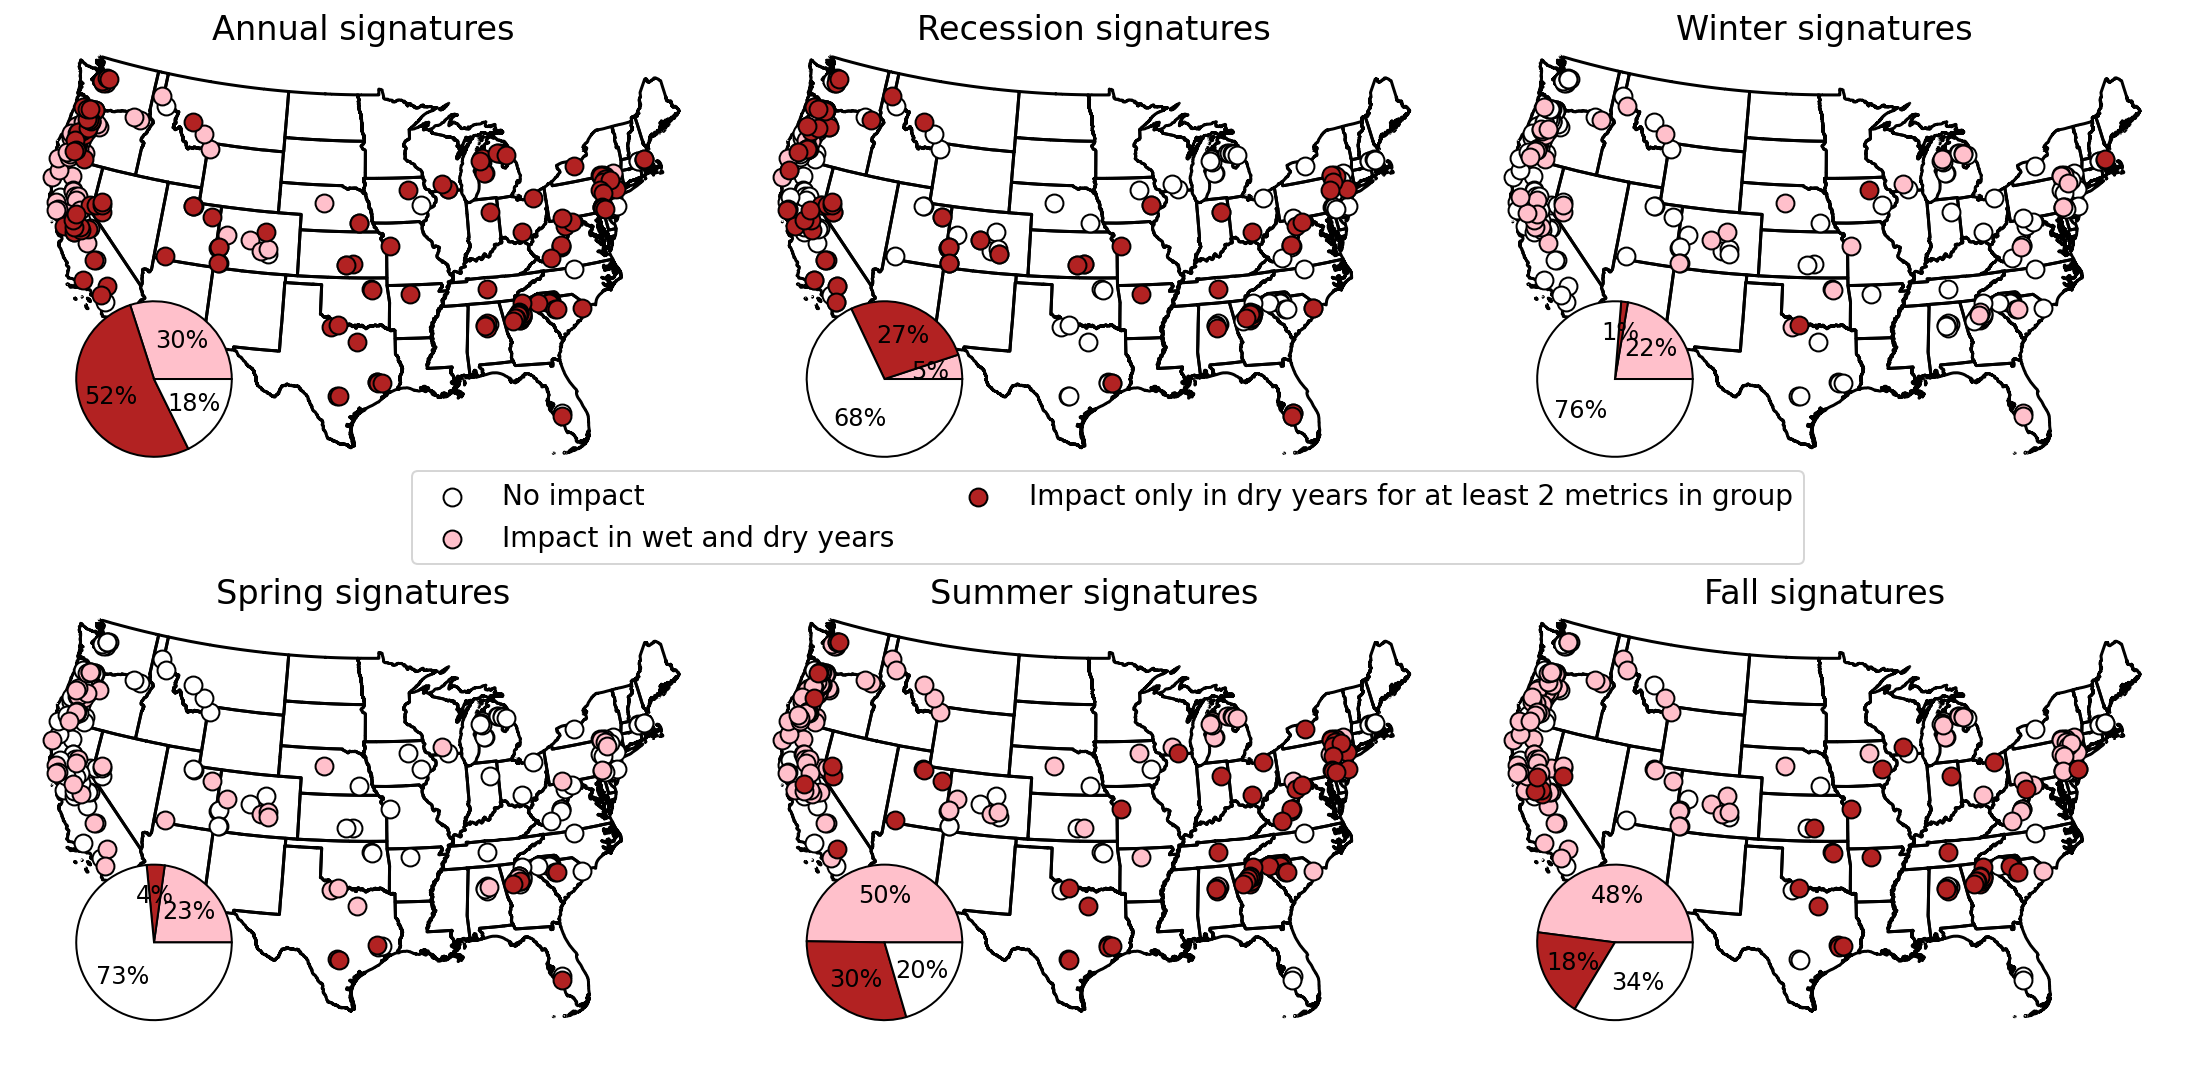

In [16]:
import matplotlib.gridspec as gridspec
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize = (20,9.5))

percentiles = np.linspace(0,100,30)

gs = gridspec.GridSpec(2,31, figure=fig)

ax1 = fig.add_subplot(gs[0,:10])
ax2 = fig.add_subplot(gs[0,10:20])
ax3 = fig.add_subplot(gs[0,20:-1])
ax4 = fig.add_subplot(gs[1,:10])
ax5 = fig.add_subplot(gs[1,10:20])
ax6 = fig.add_subplot(gs[1,20:-1])
# cax = fig.add_subplot(gs[:,-1])



axs = [ax1,ax2,ax3,ax4,ax5,ax6]
groups = [['daysbelow0.1year','totalbelow0.1year',
          'meanlowflowperiods','maxlowflowperiods'],
          ['recess7','recess14','recess30',
          'lowest7dayperyear','summer_lowest7dayperseason',
          'fall_lowest7dayperseason'],
          ['winter_daysbelow0.1seasonal',
          'winter_totalbelow0.1seasonal'],
          ['spring_daysbelow0.1seasonal',
          'spring_totalbelow0.1seasonal'],
          ['summer_daysbelow0.1seasonal',
          'summer_totalbelow0.1seasonal'],
          ['fall_totalbelow0.1seasonal',
          'fall_daysbelow0.1seasonal']
    
]

groupnames = ['Annual signatures',
             'Recession signatures',
             'Winter signatures',
             'Spring signatures',
             'Summer signatures',
             'Fall signatures']


for i in range(6):
    ax = axs[i]
    group = groups[i]
    change1 = []
    change2 = []
    for g in group:
        for s in change_sites[g]:
            if s not in change1:
                change1.append(s)
            elif s not in change2:
                change2.append(s)
                
    keepdata = ''
    for j in range(len(percentiles)):
        
        mean_change_sub1 = correlates[(correlates.climscenario=='Dry') &
                                      (correlates.pumpscenario==notebook_pumpscenario)][groups[i]]
        for col in mean_change_sub1:
            mean_change_sub1[col] = np.where(mean_change_sub1[col].abs()>change_thresh,
                                          1,0)
        mean_change_sub1['plot'] = np.where(mean_change_sub1.sum(axis=1)==len(mean_change_sub1.columns),
                                            1,0)  

    mean_change_sub = gagesII[['site','LAT_GAGE','LNG_GAGE','geometry']].to_crs('EPSG:5070')
    mean_change_sub['effect_onlydry'] = np.where(mean_change_sub.site.isin(change2),1,0)
    mean_change_sub = mean_change_sub.merge(mean_change_sub1,left_on='site',right_index=True,how='outer')
    
    state_outline.to_crs('EPSG:5070').boundary.plot(ax=ax,edgecolor = 'k',zorder = -1)
    
    mean_change_sub['lng_albers'] = mean_change_sub.geometry.x
    mean_change_sub['lat_albers'] = mean_change_sub.geometry.y
    
    effect1 = mean_change_sub[mean_change_sub.effect_onlydry==1]
    effect0 = mean_change_sub[(mean_change_sub.effect_onlydry==0) &
                             (mean_change_sub['plot']==1)]
    noimpact = mean_change_sub[(mean_change_sub['plot']==0)]
    
    ax.scatter(noimpact.lng_albers,
              noimpact.lat_albers,
              c='white',
              edgecolor = 'k',
              s = 80,
              label = 'No impact')   
    
    ax.scatter(effect0.lng_albers,
               effect0.lat_albers,
               c='pink',
               edgecolor = 'k',
               s = 80,
              label = 'Impact in wet and dry years')

    ax.scatter(effect1.lng_albers,
               effect1.lat_albers,
               c='firebrick',
               edgecolor = 'k',
               s = 80,
              label = 'Impact only in dry years for at least 2 metrics in group')
    
#     ax.set_xlim(-130,-65)
#     ax.set_ylim(22,51)
    ax.set_xlim(-0.26e7,0.25e7)
    ax.set_ylim(0e6,3.2e6)
    ax.set_title(groupnames[i])
    ax.axis('off')
    
    axins2 = inset_axes(ax, width=1.35, height=1.35, loc=8,
                       bbox_to_anchor = (0.2,-.0),
                       bbox_transform=ax.transAxes)
    
    axins2.pie([len(effect0),len(effect1),
        len(noimpact)],
       colors = ['pink',
                'firebrick',
                'white'],
       autopct='%1.0f%%',
               pctdistance=0.6,
       wedgeprops={"edgecolor":"k",},
              textprops={'fontsize':12},
              )
gs.update(wspace = 0.8)    

ax1.legend(loc='lower left',bbox_to_anchor=(.55,-.2),ncol=2)

plt.savefig('../Figures/map_dryeffect_only_'+notebook_pumpscenario+'.png',bbox_inches='tight')

In [17]:
len(effect0),len(effect1),len(noimpact),len(mean_change_sub)

(104, 40, 73, 311)

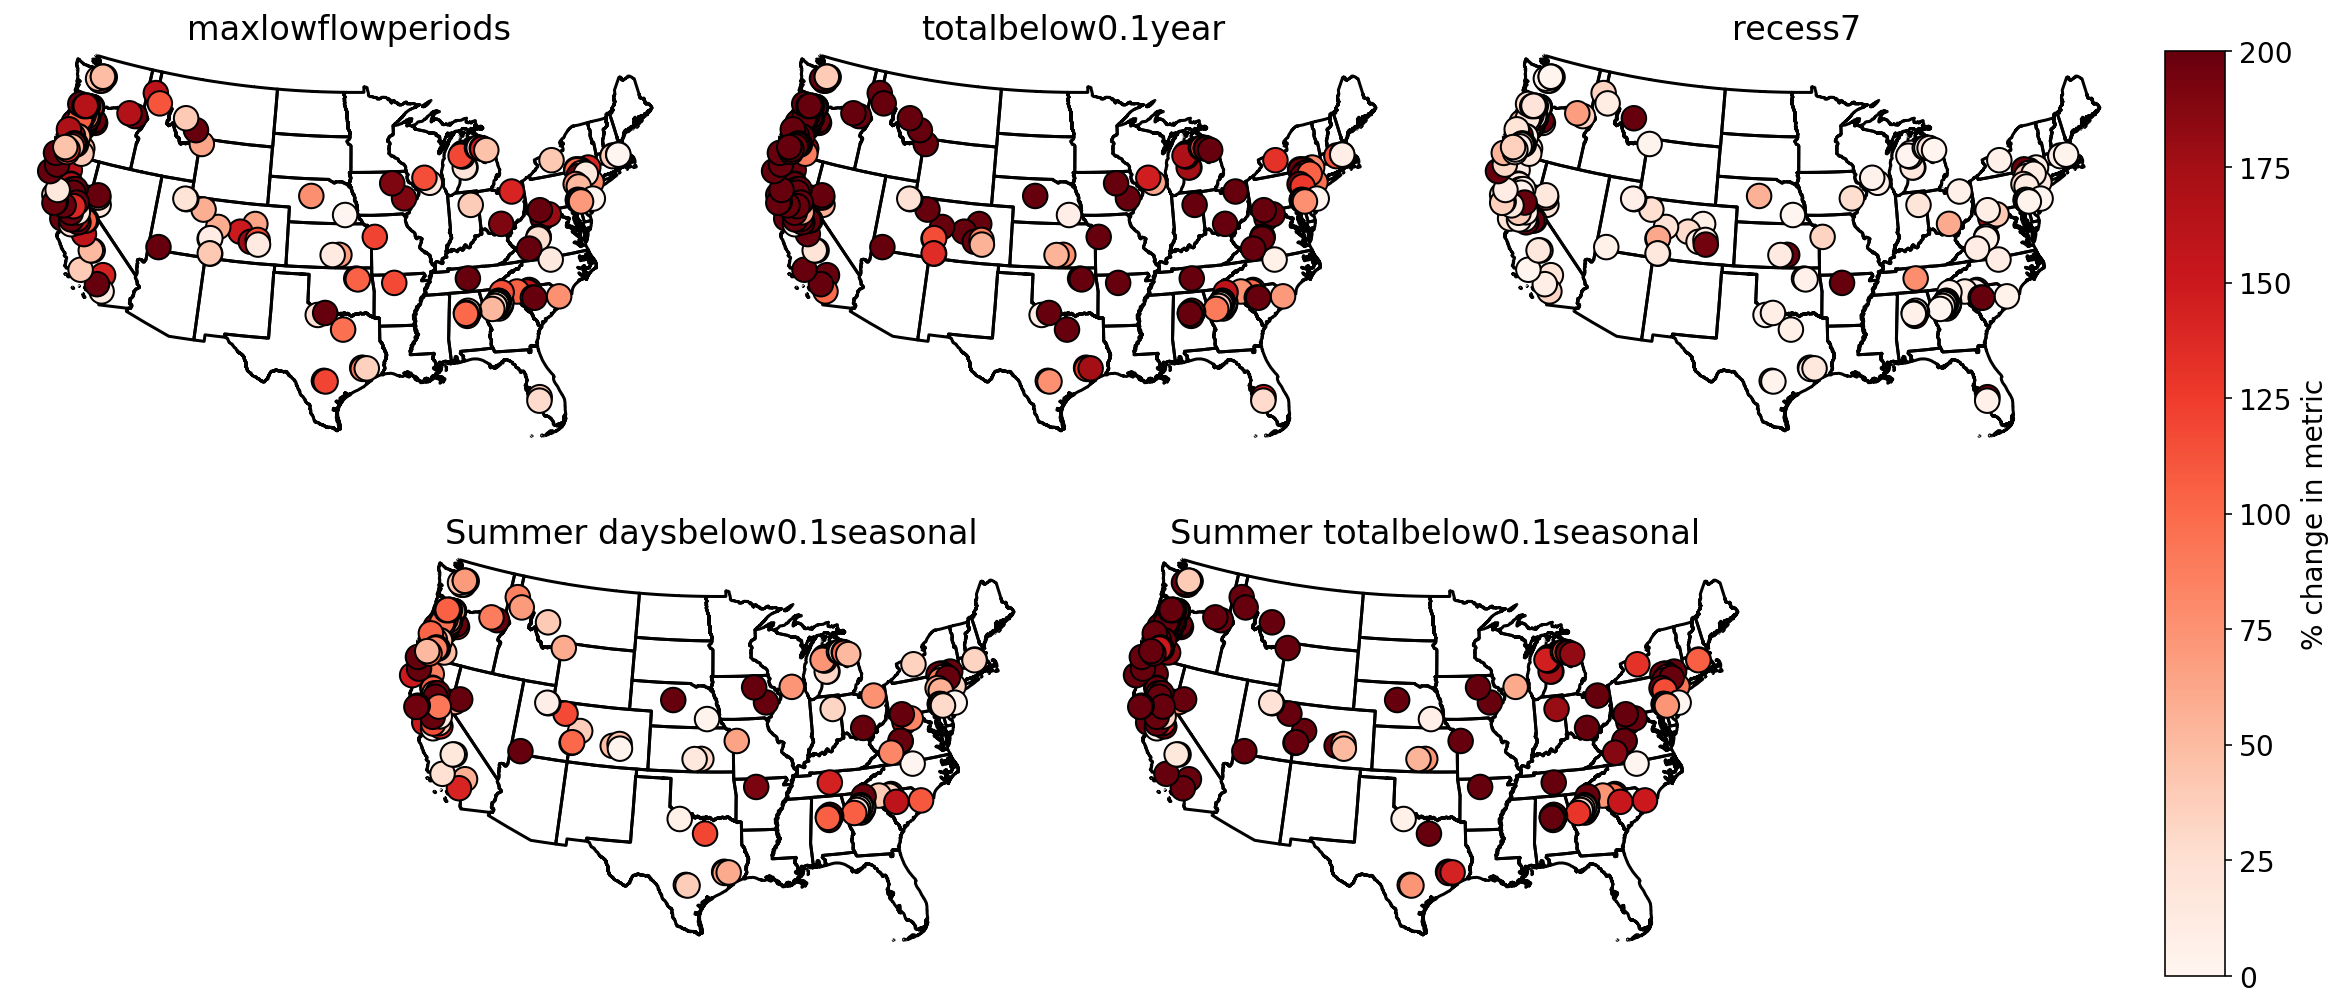

In [18]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (20,8.5))

gs = gridspec.GridSpec(2,31, figure=fig)

ax1 = fig.add_subplot(gs[0,:10])
ax2 = fig.add_subplot(gs[0,10:20])
ax3 = fig.add_subplot(gs[0,20:-1])
ax4 = fig.add_subplot(gs[1,5:15])
ax5 = fig.add_subplot(gs[1,15:25])
cax = fig.add_subplot(gs[:,-1])



axs = [ax1,ax2,ax3,ax4,ax5]
metrics = ['maxlowflowperiods','totalbelow0.1year',
          'recess7','daysbelow0.1seasonal','totalbelow0.1seasonal']
for i in range(5):
    ax = axs[i]
    metric = metrics[i]
    if i<=2:
        mean_change_sub = metric_mean.reset_index()
        mean_change_sub = mean_change_sub[(mean_change_sub.climscenario=='Dry') &
                                     (mean_change_sub.pumpscenario=='Constant')
                                     ][[metric,'site']]
    if i>2:
        mean_change_sub = metric_mean_seasonal.reset_index()
        mean_change_sub = mean_change_sub[(mean_change_sub.climscenario=='Dry') &
                                     (mean_change_sub.pumpscenario=='Constant') &
                                          (mean_change_sub.season=='summer')
                                     ][[metric,'site']]
    mean_change_sub = mean_change_sub.merge(gagesII[['site','LAT_GAGE','LNG_GAGE','geometry']].to_crs('EPSG:5070'),
                                            left_on='site',right_on='site')
    state_outline.to_crs('EPSG:5070').boundary.plot(ax=ax,edgecolor = 'k',zorder = -1)
    
    mean_change_sub = gpd.GeoDataFrame(
                    mean_change_sub, geometry=mean_change_sub.geometry)
    mean_change_sub['lng_albers'] = mean_change_sub.geometry.x
    mean_change_sub['lat_albers'] = mean_change_sub.geometry.y
    im = ax.scatter(mean_change_sub.lng_albers,
               mean_change_sub.lat_albers,
               c=mean_change_sub[metric]*100,
               edgecolor = 'k',
               s = 150,vmin = 0,vmax = 200,
                   cmap = 'Reds')
    ax.set_xlim(-0.26e7,0.25e7)
    ax.set_ylim(0e6,3.2e6)
    ax.set_title(metric)
    if i>2:
        ax.set_title('Summer '+metric)
    ax.axis('off')

cbar = plt.colorbar(im,cax = cax)
cbar.set_label('% change in metric')#+metric)

plt.savefig('../Figures/map_Qmetrics_'+notebook_pumpscenario+'.png',bbox_inches='tight')

In [36]:
# examine how long until metric first appears impacted

import os
annualfiles = os.listdir('../Data/data_publish/annual/')
flowmetrics_annual_allyears = ''
for f in annualfiles:
    fread = pd.read_csv('../Data/data_publish/annual/'+f)
    if len(flowmetrics_annual_allyears)==0:
        flowmetrics_annual_allyears = fread
    else:
        flowmetrics_annual_allyears = pd.concat([flowmetrics_annual_allyears,fread])
# flowmetrics_annual_allyears = pd.read_csv('../Data/updated_metrics_072022/all_sites_50_year_annual_flow_metrics_072122.csv')


seasonalfiles = os.listdir('../Data/data_publish/seasonal/')
flowmetrics_seasonal_allyears = ''
for f in seasonalfiles:
    fread = pd.read_csv('../Data/data_publish/seasonal/'+f)
    if len(flowmetrics_seasonal_allyears)==0:
        flowmetrics_seasonal_allyears = fread
    else:
        flowmetrics_seasonal_allyears = pd.concat([flowmetrics_seasonal_allyears,fread])
# flowmetrics_seasonal_allyears = pd.read_csv('../Data/updated_metrics_072022/all_sites_50_year_seasonal_flow_metrics_072222.csv')


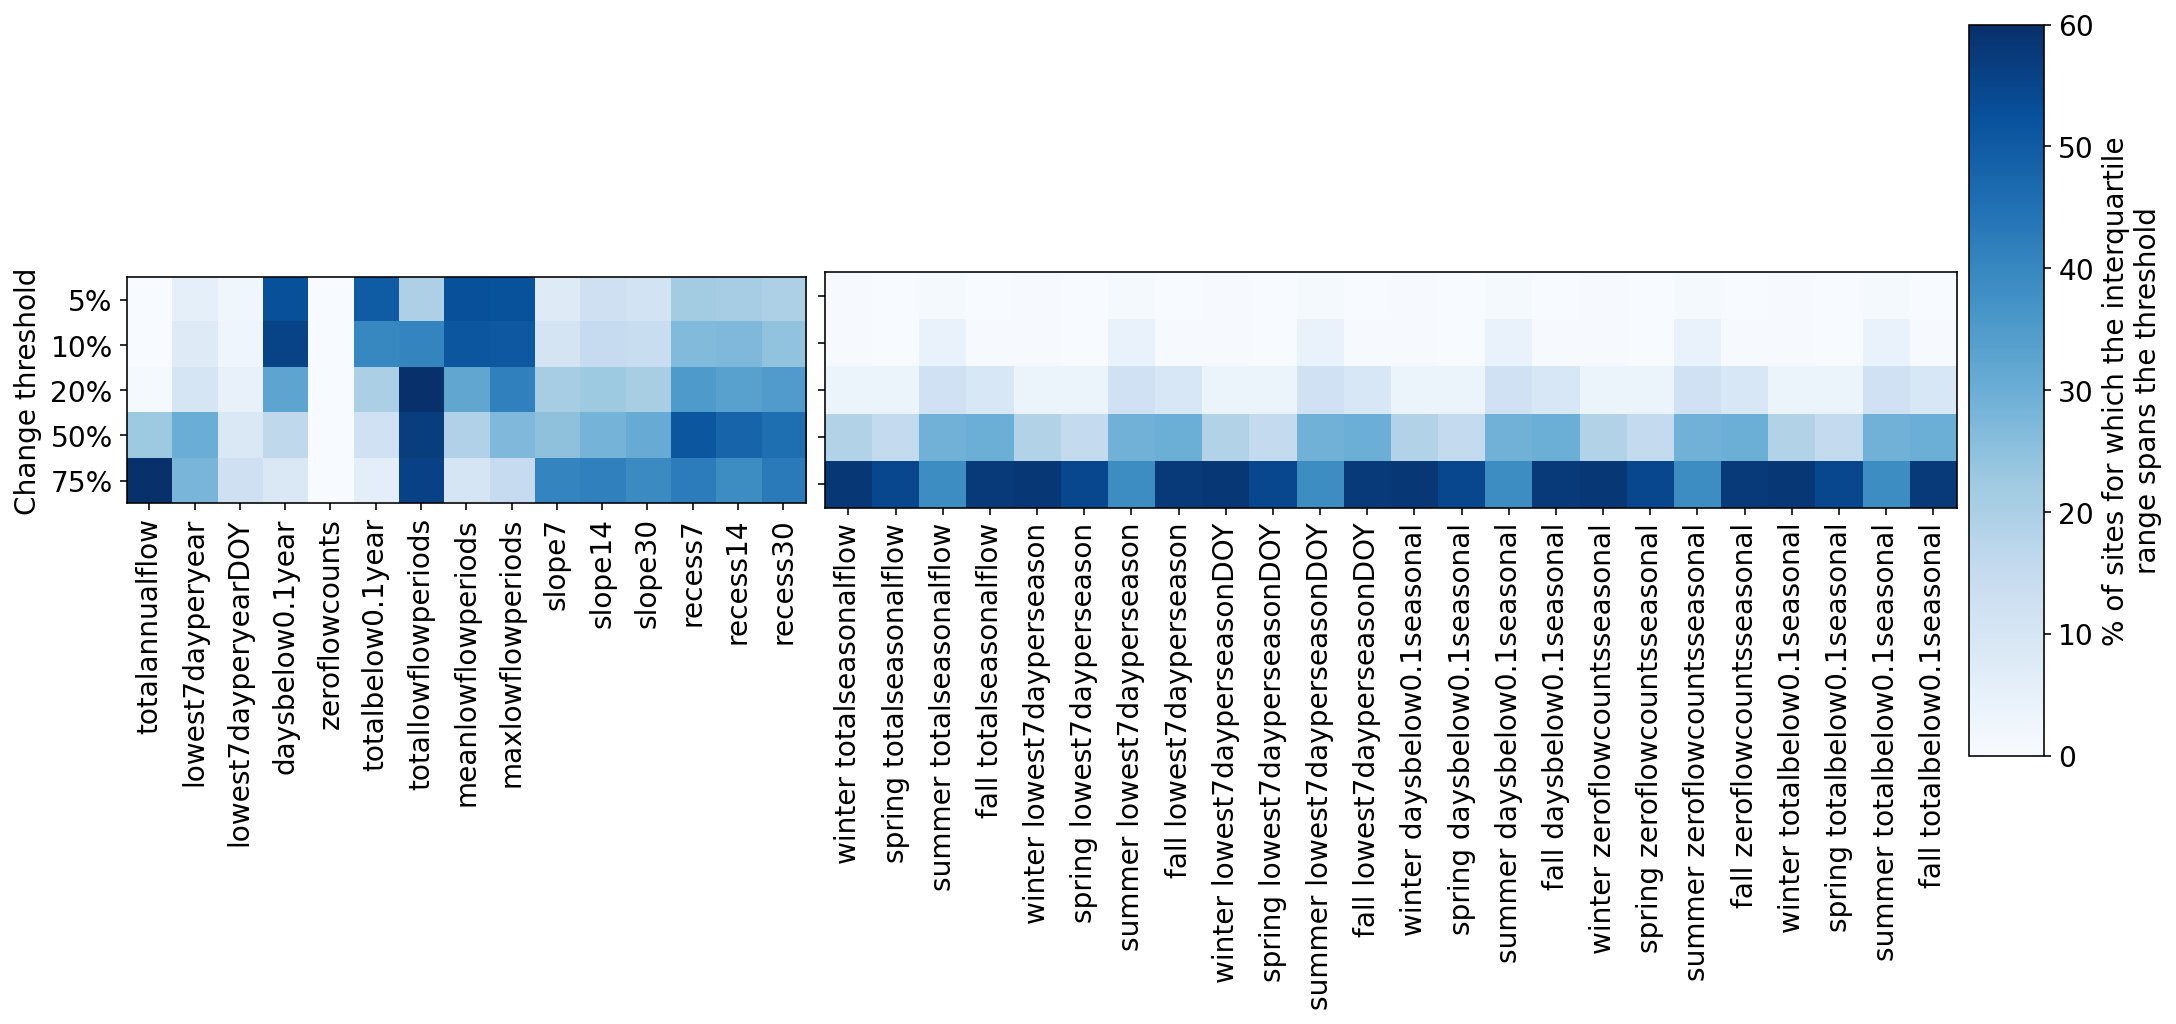

In [37]:
# look at uncertainty--% of sites that go from not change to change through parameter uncertainty

# make heatmaps of metric impacts

metric_names = list(mean_change.columns)
metrics_seasonal = metric_mean_seasonal.columns
metric_names_seasonal =(metric_mean_seasonal.columns)#[m.replace('seasonal','') for m in  
#                         (metric_mean_seasonal.columns)]



seasons = ['winter','spring','summer','fall']
metric_names_seasonal = [s+' '+m for m in metric_names_seasonal for s in seasons]


climscenarios = ['Dry',]
pumpsims = [notebook_pumpscenario]
scenarios = [c+', '+p for p in pumpsims for c in climscenarios]

def frac_change_annual(metric ,sim, df, change_thresh):
    p = sim.split(', ')
    c = p[0]
    p = p[1]
    subset = df.reset_index()[(df.reset_index().pumpscenario==p)&
                        (df.reset_index().climscenario==c)]
    mchange = len(subset[subset[metric].abs()>change_thresh])/len(subset)
    return mchange




change_thresh = 0.2

fig = plt.figure(figsize=(15,7), constrained_layout=True)
spec = fig.add_gridspec(ncols=25, nrows=1)

cax = fig.add_subplot(spec[:,24])
ax0 = fig.add_subplot(spec[0,:9])
ax00 = fig.add_subplot(spec[0,9:24])

axs = [[ax0,ax00],]

axx = [axs[0][0],]
dfs = [flowmetric_annual_p25,
      flowmetric_annual_p75]

X, Y = np.meshgrid(metric_names, scenarios)
Zss = []
threshes = [.75,.5,.2,.1,.05]
for thresholds in threshes:
    Zs = []
    change_thresh = thresholds
    for k in range(2):

        Z = np.array([np.array([frac_change_annual(X[i][j],Y[i][j],
                                                   dfs[k],change_thresh) 
                                for j in range(len(Y[0]))])
                    for i in range(len(Y))])
        Zs.append(Z[0])
    Zss.append((Zs[1]-Zs[0])*100)

Z = np.array(Zss)
ax = ax0
im = ax.imshow(Z,vmin=0,vmax=60, cmap = 'Blues')
ax.set_xticks(list(range(len(metric_names))))
ax.set_xticklabels(metric_names,rotation = 90)
ax.set_yticks(list(range(len(threshes))))
ax.set_yticklabels(['5%','10%','20%','50%','75%'])
ax.set_ylabel('Change threshold')
    

axx = [axs[0][1],]
dfs = [flowmetric_seasonal_p25,
      flowmetric_seasonal_p75]

Zss = []
for threshold in threshes:
    change_thresh = threshold
    Zs = []
    for k in range(len(dfs)):

        df_this = []
        for s in seasons:
            df = dfs[k].reset_index()
            df = df[df.season==s]
            df = df.set_index(['season','site','pumpscenario','climscenario'])
            df_this.append(df)
        Z = np.array([np.array([frac_change_annual(metrics_seasonal[i],
                                                   scenarios[0],
                                           df,change_thresh) 
                        for j in range(len(metrics_seasonal)) for df in df_this])
            for i in range(len(scenarios))])
        Zs.append(Z[0])
    Zss.append((Zs[1]-Zs[0])*100)
    
Z = np.array(Zss)
ax = axx[0]
im = ax.imshow(Z,vmin=0,vmax=60,cmap='Blues')
ax.set_xticks(list(range(len(metric_names_seasonal))))
ax.set_yticks(list(range(len(threshes))))
ax.set_yticklabels([])
ax.set_xticklabels(metric_names_seasonal,rotation=90)

cbar = plt.colorbar(im,cax=cax)
cbar.set_label('% of sites for which the interquartile\nrange spans the threshold')


plt.savefig('../Figures/heatmaps_streamflow_uncertainty.png',format='png',dpi=300,bbox_inches='tight')

In [38]:
fmean = flowmetric_annual_mean.reset_index()
fmean = fmean[(fmean.climscenario=='Dry') &
                  (fmean.pumpscenario==notebook_pumpscenario)].drop(columns=['climscenario','pumpscenario','year',]).set_index('site')
fmean_seasonal = flowmetric_seasonal_mean.reset_index()
fmean_seasonal = fmean_seasonal[(fmean_seasonal.climscenario=='Dry') &
                               (fmean_seasonal.pumpscenario==notebook_pumpscenario)].drop(columns=['year','pumpscenario','climscenario',]).set_index('site')

correlates = fmean

for season in ['winter','spring','summer','fall']:
    fmean_season = fmean_seasonal[fmean_seasonal.season==season].drop(columns='season')
    fmean_season = fmean_season.rename(columns={col:season+'_'+col
                                               for col in fmean_season.columns})
    correlates = correlates.merge(fmean_season,left_index=True,right_index=True)
    

    
    
fmean25 = flowmetric_annual_p25.reset_index()
fmean25 = fmean25.drop(columns=['climscenario','pumpscenario','year',]).set_index('site')
fmean25_seasonal = flowmetric_seasonal_p25.reset_index()
fmean25_seasonal = fmean25_seasonal[(fmean25_seasonal.climscenario=='Dry') &
                               (fmean25_seasonal.pumpscenario==notebook_pumpscenario)].drop(columns=['year','pumpscenario','climscenario',]).set_index('site')

correlates_p25 = fmean25

for season in ['winter','spring','summer','fall']:
    fmean25_season = fmean25_seasonal[fmean25_seasonal.season==season].drop(columns='season')
    fmean25_season = fmean25_season.rename(columns={col:season+'_'+col
                                               for col in fmean25_season.columns})
    correlates_p25 = correlates_p25.merge(fmean25_season,left_index=True,right_index=True)
    

    
    
    
fmean75 = flowmetric_annual_p75.reset_index()
fmean75 = fmean75.drop(columns=['climscenario','pumpscenario','year',]).set_index('site')
fmean75_seasonal = flowmetric_seasonal_p75.reset_index()
fmean75_seasonal = fmean75_seasonal[(fmean75_seasonal.climscenario=='Dry') &
                               (fmean75_seasonal.pumpscenario==notebook_pumpscenario)].drop(columns=['year','pumpscenario','climscenario',]).set_index('site')

correlates_p75 = fmean75

for season in ['winter','spring','summer','fall']:
    fmean75_season = fmean75_seasonal[fmean75_seasonal.season==season].drop(columns='season')
    fmean75_season = fmean75_season.rename(columns={col:season+'_'+col
                                               for col in fmean75_season.columns})
    correlates_p75 = correlates_p75.merge(fmean75_season,left_index=True,right_index=True)

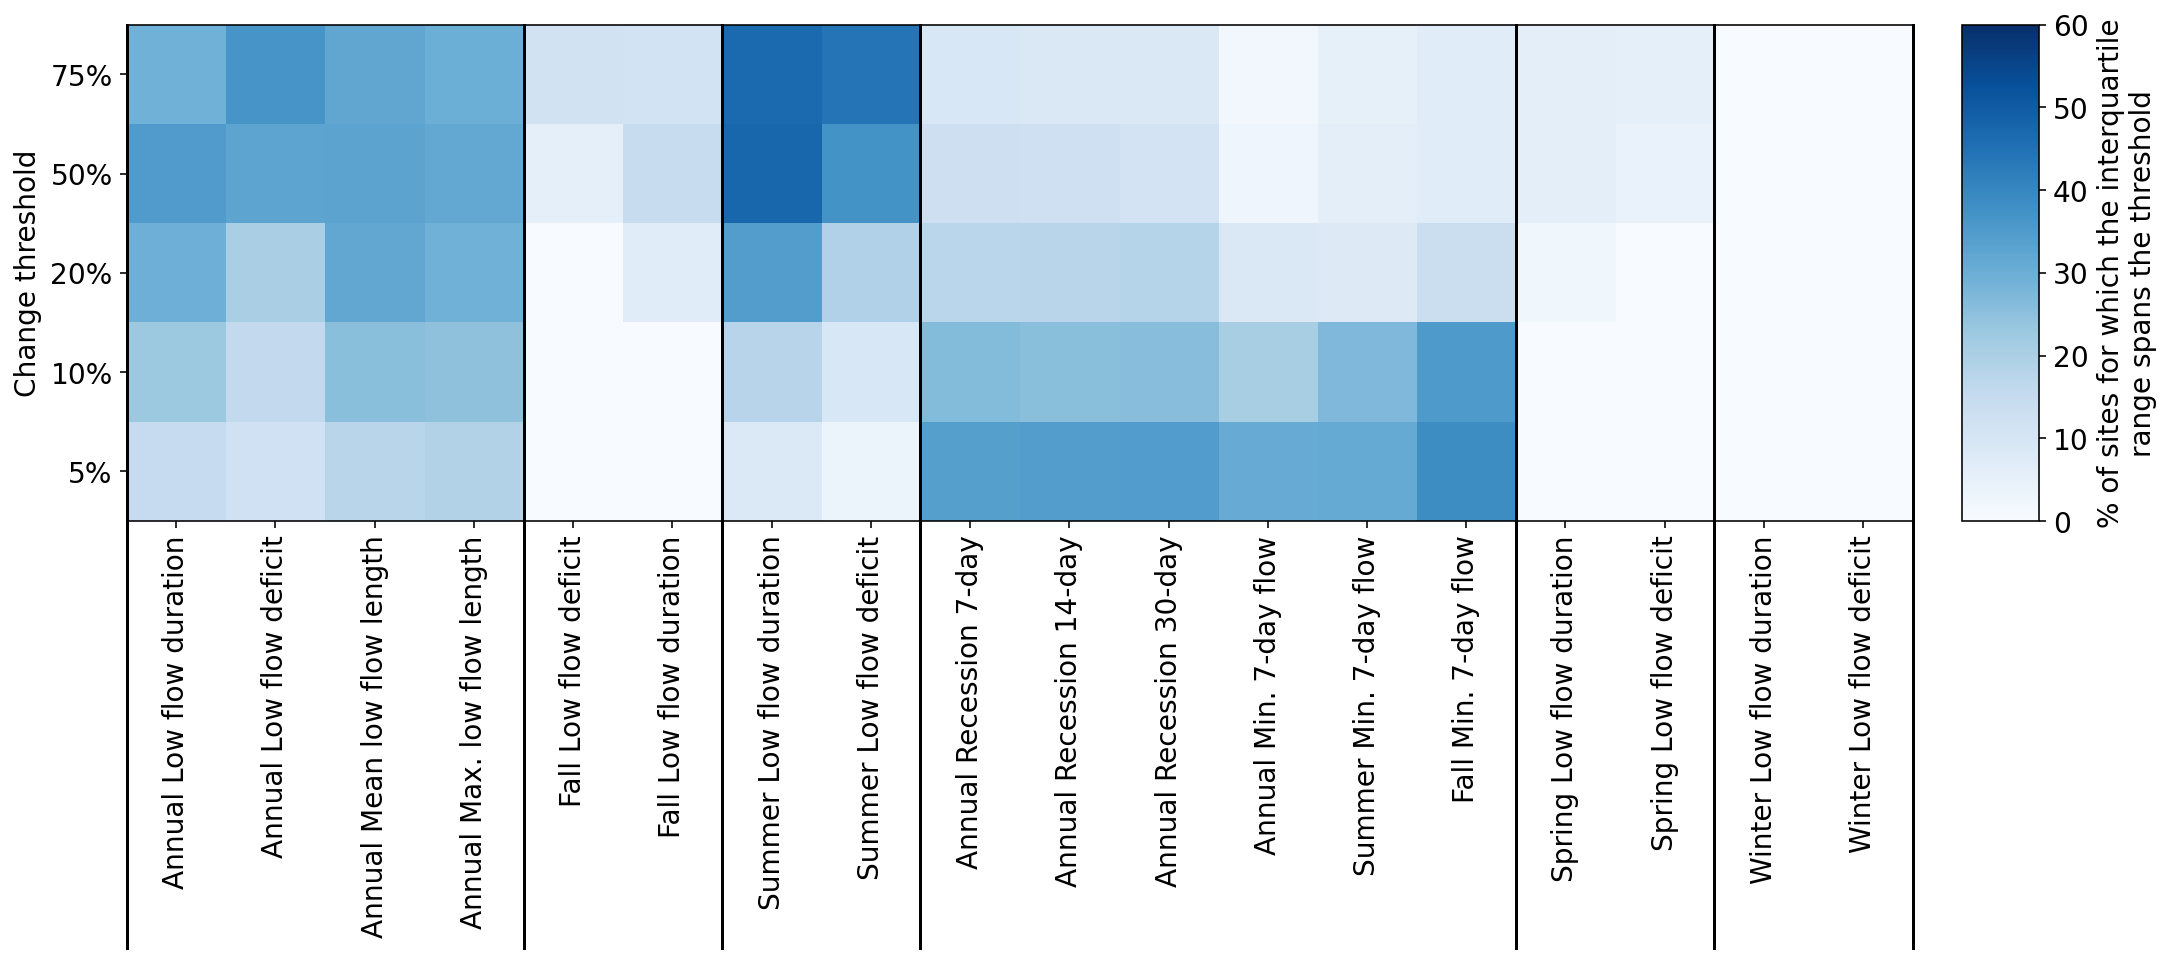

In [39]:
# look at uncertainty--% of sites that go from not change to change through parameter uncertainty

# make heatmaps of metric impacts

metrics_all = [
               'daysbelow0.1year','totalbelow0.1year',
         'meanlowflowperiods','maxlowflowperiods',
         
    'fall_totalbelow0.1seasonal',
         'fall_daysbelow0.1seasonal',
              'summer_daysbelow0.1seasonal', 
          'summer_totalbelow0.1seasonal',
    'recess7','recess14','recess30',
         'lowest7dayperyear',
               'summer_lowest7dayperseason',
    'fall_lowest7dayperseason',
          'spring_daysbelow0.1seasonal', 
          'spring_totalbelow0.1seasonal' ,
             
              'winter_daysbelow0.1seasonal',
         'winter_totalbelow0.1seasonal',
            
              ]

climscenarios = ['Dry',]
pumpsims = [notebook_pumpscenario]
scenarios = [c+', '+p for p in pumpsims for c in climscenarios]

def frac_change(metric ,df, change_thresh):

    subset = df.reset_index()
    mchange = len(subset[subset[metric].abs()>change_thresh])/len(subset)
    return mchange




change_thresh = 0.2

fig = plt.figure(figsize=(15,6.5), constrained_layout=True)
spec = fig.add_gridspec(ncols=25, nrows=1)

cax = fig.add_subplot(spec[:,24])
ax0 = fig.add_subplot(spec[0,:24])

axx = ax0

dfs = [correlates_p25,
      correlates_p75]


Zss = []
threshes = [.05,.1,.2,.5,.75,]
for thresholds in threshes:
    Zs = []
    change_thresh = thresholds
    for k in range(2):

        Z = np.array([frac_change(metrics_all[j],
                                                   dfs[k],change_thresh) 
                                for j in range(len(metrics_all))])
        Zs.append(Z)
    Zss.append((Zs[1]-Zs[0])*100)

Z = np.array(Zss)
ax = ax0
im = ax.imshow(Z,vmin=0,vmax=60, cmap = 'Blues')
ax.set_xticks(list(range(len(metrics_all))))
ax.set_xticklabels(metric_labels,
#                    metrics_all,
                   rotation = 90)
ax.set_yticks(list(range(len(threshes))))
ax.set_yticklabels(['5%','10%','20%','50%','75%'])
ax.set_ylabel('Change threshold')
    
cbar = plt.colorbar(im,cax=cax)
cbar.set_label('% of sites for which the interquartile\nrange spans the threshold')

for xv in [-.5,3.5,5.5,7.5,13.5,15.5,17.5]:
    ax.plot([xv]*2,[-4.8,4.5],c='k',
       clip_on=False)

ax.set_ylim(-0.5,4.5)


plt.savefig('../Figures/heatmaps_streamflow_uncertainty_reorder_'+notebook_pumpscenario+'.png',
            format='png',dpi=300,bbox_inches='tight')

## check out spatial correlations in metric changes

In [40]:
change_together = []
change_thresh = 0.2
change_together_thresh = 0.5

for metric in correlates.columns:
    changesites = correlates[correlates[metric]>change_thresh]
    changes = []
    if len(changesites)>50:
        for m in correlates.columns:
            changefrac = len(changesites[changesites[m]>change_thresh])/len(changesites)
            if (changefrac>change_together_thresh):
                changes.append(m)
    if len(changes)>0:
        change_together.append(changes)
        
group1 = ['daysbelow0.1year','totalbelow0.1year',
         'meanlowflowperiods','maxlowflowperiods',
#          'summer_totalbelow0.1seasonal'
         ]

group2 = ['summer_lowest7dayperseason',
#          'summer_daysbelow0.1seasonal',
         'recess7','recess14','recess30',
         'lowest7dayperyear',
          'fall_lowest7dayperseason'
#          'summer_totalbelow0.1seasonal'
         ]

group3 = ['totallowflowperiods',
         'winter_daysbelow0.1seasonal',
         'winter_totalbelow0.1seasonal']

group4 = ['summer_daysbelow0.1seasonal', 
          'summer_totalbelow0.1seasonal']

group5 = ['totallowflowperiods', 
          'spring_daysbelow0.1seasonal', 
          'spring_totalbelow0.1seasonal']

group6 = ['fall_totalbelow0.1seasonal',
         'fall_daysbelow0.1seasonal']

groupnames = {'annualgroup':group1,
              'summergroup':group2,
             'wintergroup':group3,
             'summergroup_small':group4,
             'springgroup':group5,
             'fallgroup':group6}

for i in range(len(change_together)):
    for groupname in groupnames:
        group = groupnames[groupname]
        if all(item in change_together[i] for item in group):
            for item in group:
                change_together[i].remove(item)
            change_together[i].append(groupname)

            
    
import itertools
change_together.sort()
list(change_together for change_together,_ in itertools.groupby(change_together))

[['annualgroup', 'summergroup_small', 'springgroup', 'fallgroup'],
 ['annualgroup', 'wintergroup', 'summergroup_small', 'fallgroup'],
 ['totallowflowperiods', 'annualgroup', 'summergroup_small', 'fallgroup'],
 ['totallowflowperiods',
  'spring_lowest7dayperseason',
  'summer_totalseasonalflow',
  'annualgroup',
  'summergroup',
  'summergroup_small',
  'fallgroup'],
 ['totallowflowperiods',
  'summer_totalseasonalflow',
  'annualgroup',
  'summergroup',
  'summergroup_small',
  'fallgroup']]

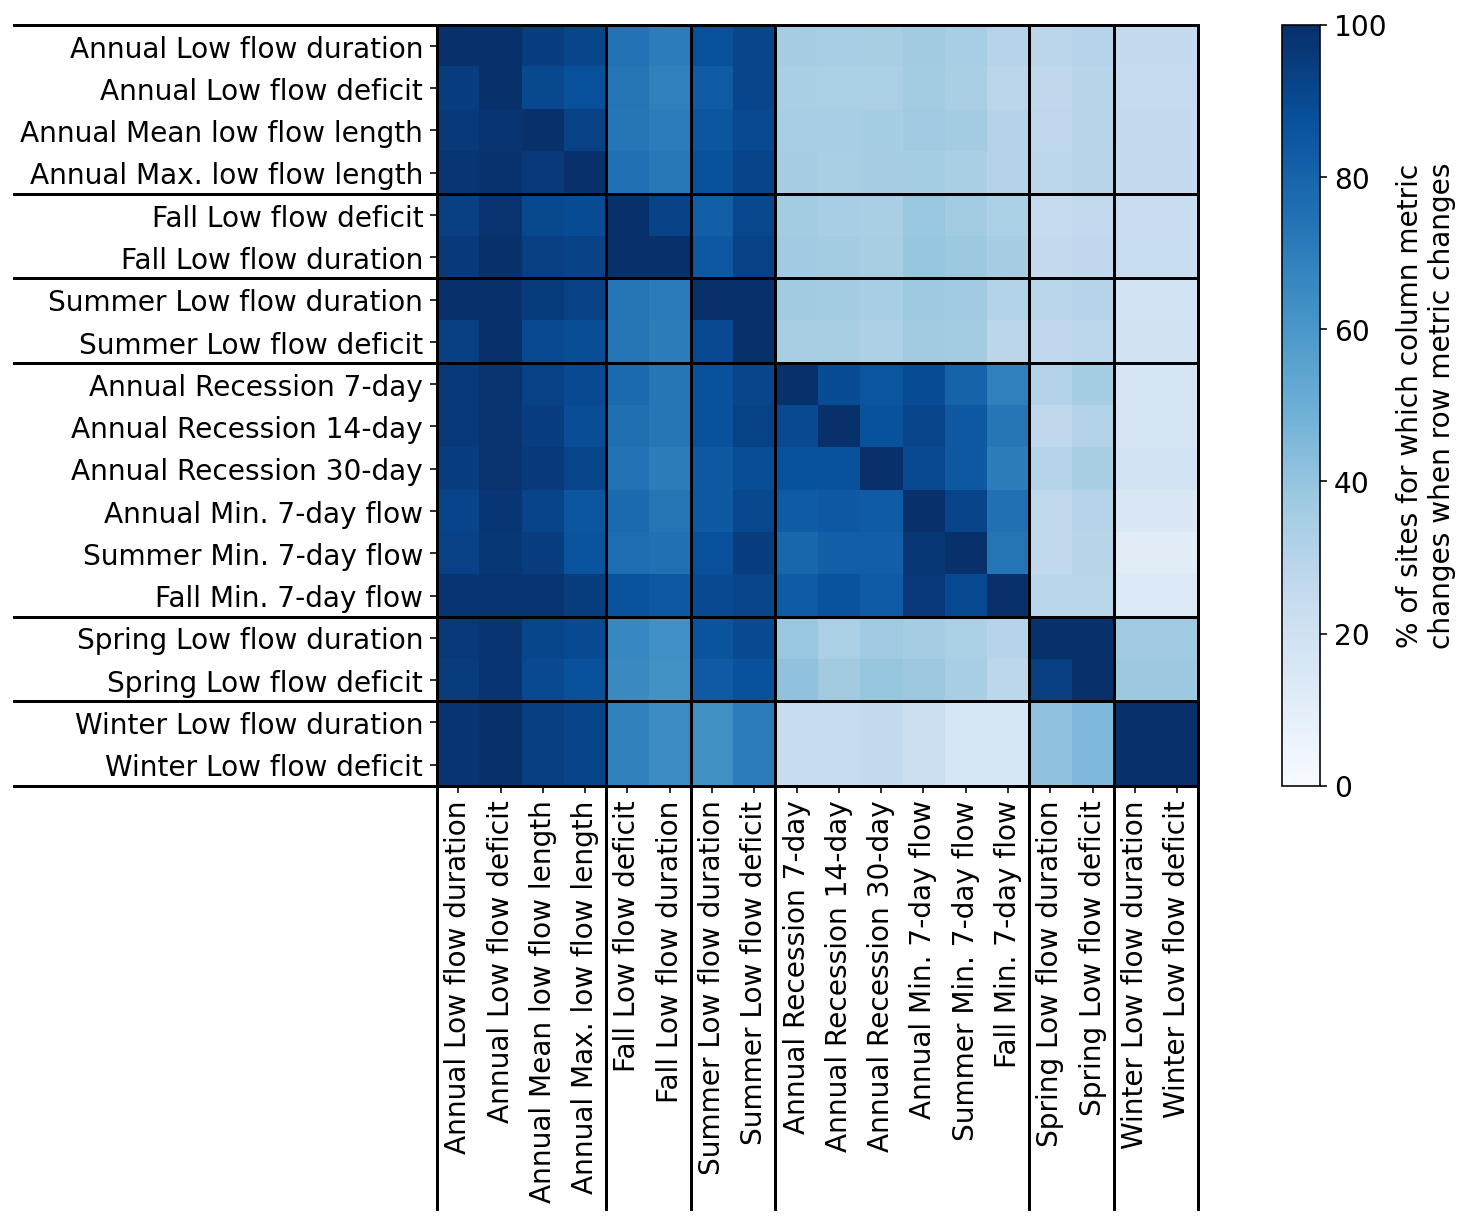

In [41]:
change_together = []
change_thresh = 0.2
change_together_thresh = 0.8
rows = []

metrics_all = [
               'daysbelow0.1year','totalbelow0.1year',
         'meanlowflowperiods','maxlowflowperiods',
         
    'fall_totalbelow0.1seasonal',
         'fall_daysbelow0.1seasonal',
              'summer_daysbelow0.1seasonal', 
          'summer_totalbelow0.1seasonal',
    'recess7','recess14','recess30',
         'lowest7dayperyear',
               'summer_lowest7dayperseason',
    'fall_lowest7dayperseason',
          'spring_daysbelow0.1seasonal', 
          'spring_totalbelow0.1seasonal' ,
             
              'winter_daysbelow0.1seasonal',
         'winter_totalbelow0.1seasonal',
            
              ]

for metric in metrics_all:
    changesites = correlates[correlates[metric]>change_thresh]
    changes = []
    if len(changesites)>50:
        rows.append(metric)
        for m in metrics_all:
            changefrac = len(changesites[changesites[m]>change_thresh])/len(changesites)
            changes.append(changefrac*100)
        change_together.append(changes)

change_together.reverse()
rows.reverse()
        
fig,ax = plt.subplots(1,figsize = (15,7))        
im = ax.imshow(change_together,vmin = 0,vmax = 100,
              cmap = 'Blues')
cbar = plt.colorbar(im)
cbar.set_label('% of sites for which column metric\n'+
              'changes when row metric changes')
ax.set_yticks(list(range(len(change_together))))
ax.set_yticklabels(metric_labels[::-1])#rows)
ax.set_xticks(list(range(len(metrics_all))))
ax.set_xticklabels(metric_labels,
#                    metrics_all,
                   rotation=90)

for xv in [-.5,3.5,5.5,7.5,13.5,15.5,17.5]:
    ax.plot([xv]*2,[-10.5,17.5],c='k',
       clip_on=False)
    ax.plot([-10.5,17.5],[17-xv]*2,c='k',
       clip_on=False)



ax.set_ylim(-.5,17.5)
ax.set_xlim(-.5,17.5)

plt.savefig('../Figures/correlates_fig'+notebook_pumpscenario+'.png',format='png',
           dpi = 300, bbox_inches='tight')

In [42]:
percentiles = np.linspace(0,100,30)
pdfs = []
    
for p in percentiles:
    flowmetric_annual_p = (flow_annual_abschanges.abs()/flow_annual_starts.abs()).reset_index().groupby(['site','climscenario','pumpscenario']).quantile(p/100)
    flowmetric_seasonal_p = (flow_seasonal_abschanges.abs()/flow_seasonal_starts.abs()).reset_index().groupby(['site','climscenario','pumpscenario','season']).quantile(p/100)

    fmean = flowmetric_annual_p.reset_index()
    fmean = fmean[(fmean.climscenario=='Dry') &
                      (fmean.pumpscenario==notebook_pumpscenario)].drop(columns=['climscenario','pumpscenario','year',]).set_index('site')
    fmean_seasonal = flowmetric_seasonal_p.reset_index()
    fmean_seasonal = fmean_seasonal[(fmean_seasonal.climscenario=='Dry') &
                                   (fmean_seasonal.pumpscenario==notebook_pumpscenario)].drop(columns=['year','pumpscenario','climscenario',]).set_index('site')

    correlates1 = fmean

    for season in ['winter','spring','summer','fall']:
        fmean_season = fmean_seasonal[fmean_seasonal.season==season].drop(columns='season')
        fmean_season = fmean_season.rename(columns={col:season+'_'+col
                                                   for col in fmean_season.columns})
        correlates1 = correlates1.merge(fmean_season,left_index=True,right_index=True)
        
    pdfs.append(correlates1)

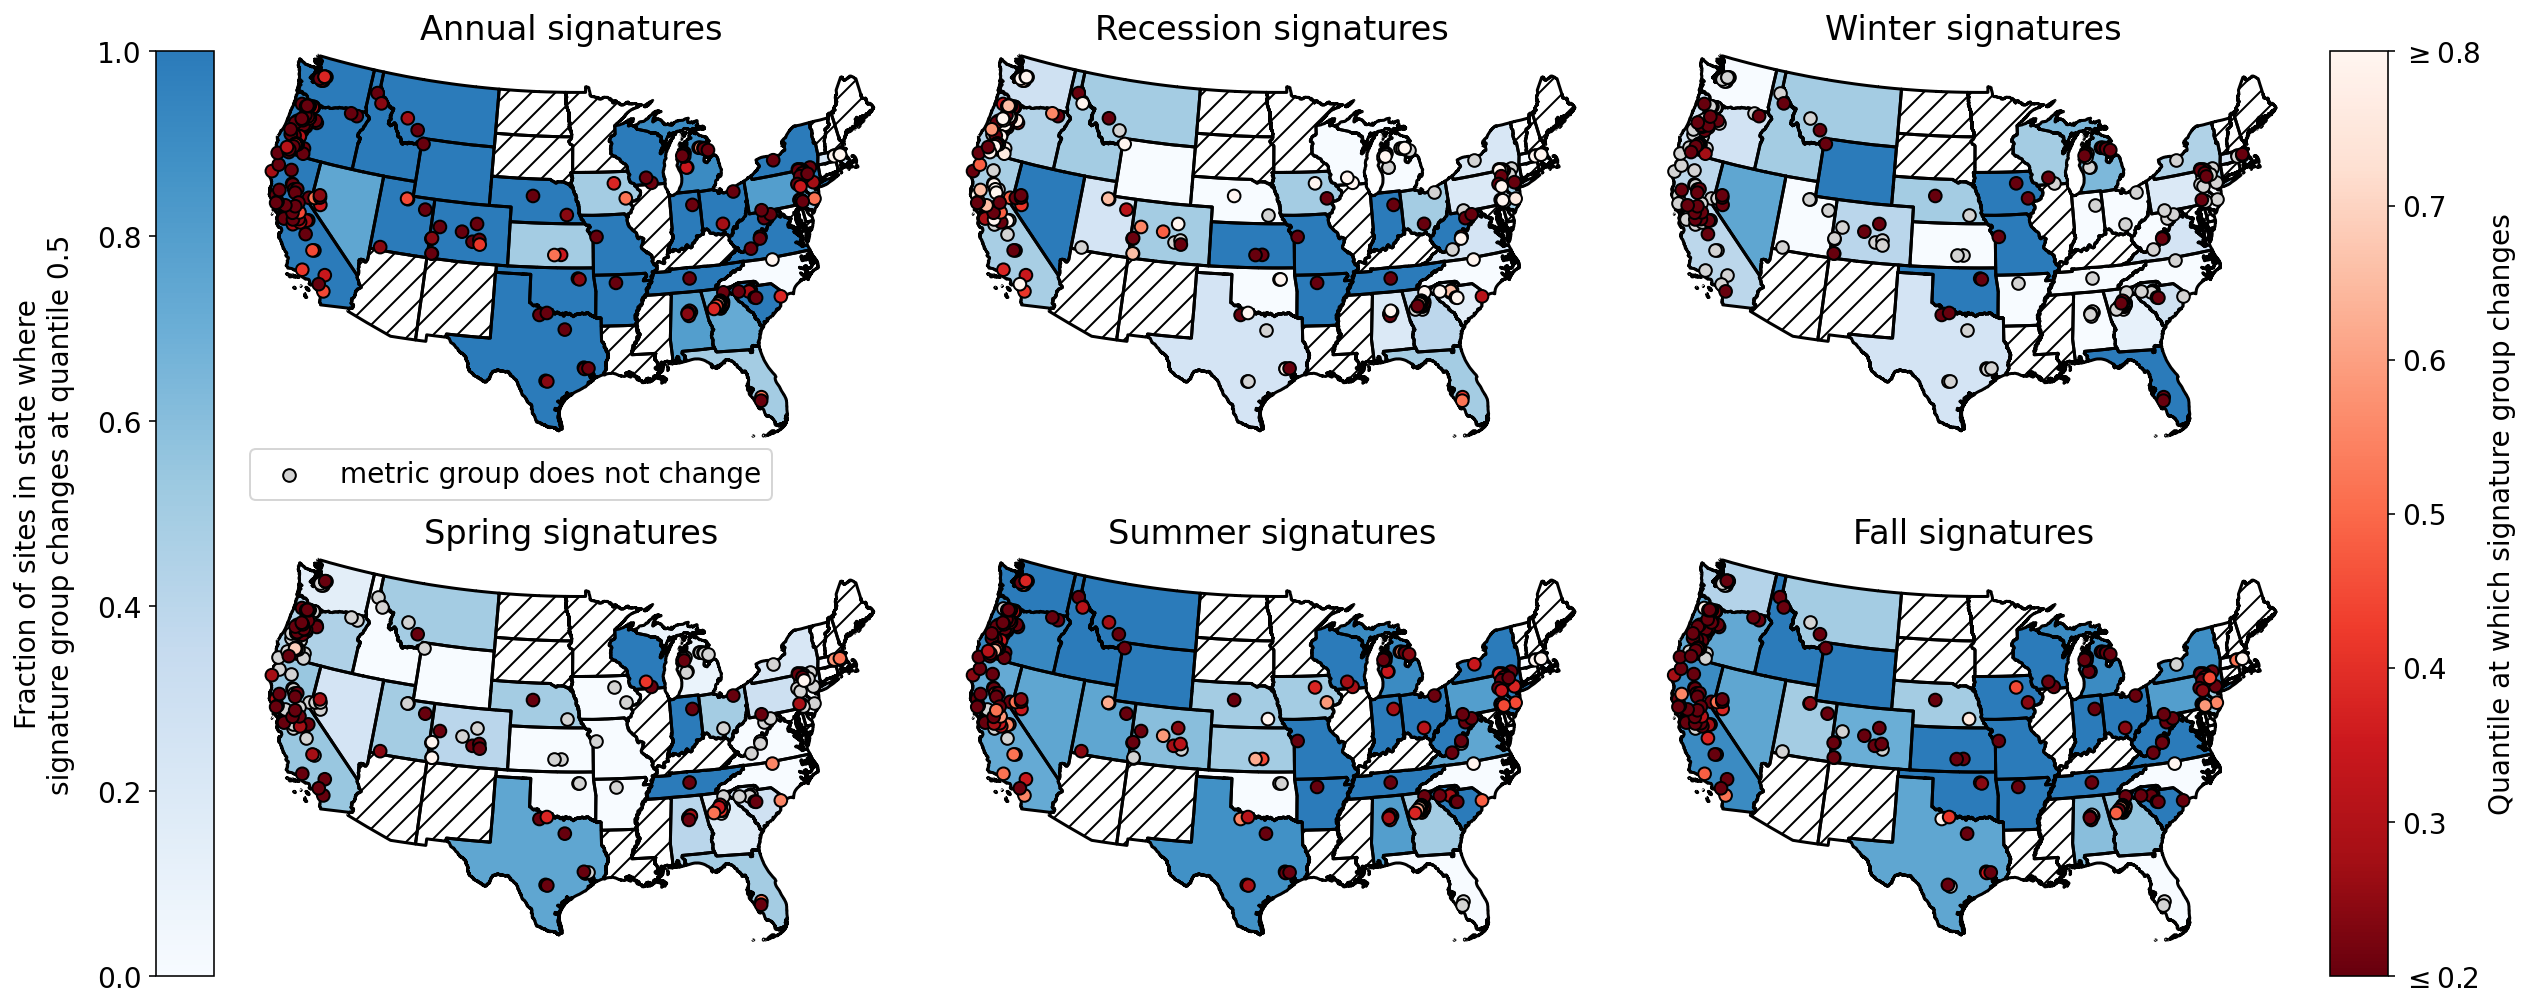

In [43]:
import matplotlib.gridspec as gridspec
import matplotlib
fig = plt.figure(figsize = (20,8.5))

gs = gridspec.GridSpec(2,32, figure=fig)

ax1 = fig.add_subplot(gs[0,1:11])
ax2 = fig.add_subplot(gs[0,11:21])
ax3 = fig.add_subplot(gs[0,21:-1])
ax4 = fig.add_subplot(gs[1,1:11])
ax5 = fig.add_subplot(gs[1,11:21])
ax6 = fig.add_subplot(gs[1,21:-1])
cax = fig.add_subplot(gs[:,-1])
cax_left = fig.add_subplot(gs[:,0])



axs = [ax1,ax2,ax3,ax4,ax5,ax6]
groups = [['daysbelow0.1year','totalbelow0.1year',
          'meanlowflowperiods','maxlowflowperiods'],
          ['recess7','recess14','recess30',
          'lowest7dayperyear','summer_lowest7dayperseason',
          'fall_lowest7dayperseason'],
          ['winter_daysbelow0.1seasonal',
          'winter_totalbelow0.1seasonal'],
          ['spring_daysbelow0.1seasonal',
          'spring_totalbelow0.1seasonal'],
          ['summer_daysbelow0.1seasonal',
          'summer_totalbelow0.1seasonal'],
          ['fall_totalbelow0.1seasonal',
          'fall_daysbelow0.1seasonal']
    
]

groupnames = ['Annual signatures',
             'Recession signatures',
             'Winter signatures',
             'Spring signatures',
             'Summer signatures',
             'Fall signatures']

change_thresh = 0.2
for i in range(6):
    ax = axs[i]
    group = groups[i]
    keepdata = ''
    for j in range(len(percentiles)):
        
        mean_change_sub1 = pdfs[j][groups[i]]
        for col in mean_change_sub1:
            mean_change_sub1[col] = np.where(mean_change_sub1[col]>change_thresh,
                                          1,0)
        mean_change_sub1['plot'] = np.where(mean_change_sub1.sum(axis=1)>=2,
                                            percentiles[j]/100,np.nan)
        if len(keepdata)==0:
            keepdata = mean_change_sub1[['plot']]
        else:
            keepdata['plot'] = np.where(np.isnan(keepdata['plot']) ,
                                       mean_change_sub1['plot'],keepdata['plot'])
        
    pts = gagesII[['STAID','geometry']].to_crs('EPSG:5070')
    pts['STAID'] = pts.STAID.astype('int')
    pts = keepdata[['plot']].merge(pts,left_index=True,right_on='STAID')
    pts = gpd.GeoDataFrame(pts, geometry=pts.geometry)
    state_sums = gpd.sjoin(state_outline[['STUSPS','geometry']].to_crs('EPSG:5070'),pts)#.dropna()
    state_sums['naplot'] = np.where(~((state_sums['plot'])<=0.5),1,0)
    state_sums['plot'] = np.where((state_sums['plot'])<=0.5,1,0)
    state_sums = state_sums.drop(columns=['geometry','index_right','STAID']).groupby(['STUSPS',]).sum()
    state_sums = state_sums.merge(state_outline[['geometry','STUSPS']].to_crs('EPSG:5070'),
                                                 left_on='STUSPS',right_on='STUSPS')
    state_sums = gpd.GeoDataFrame(state_sums, geometry=state_sums.geometry)
    state_sums['frac'] = state_sums['plot']/(state_sums['plot']+state_sums['naplot'])
    
    
    cm = state_sums.to_crs('EPSG:4326').to_crs('EPSG:5070').plot(column='frac',ax=ax,cmap = 'Blues',
                   vmin=0,vmax=1.4,legend=False)

    pts = gagesII[['STAID','geometry']].to_crs('EPSG:5070')
    pts['STAID'] = pts.STAID.astype('int')
    pts = keepdata[['plot']].merge(pts,left_index=True,right_on='STAID')
    pts = gpd.GeoDataFrame(pts, geometry=pts.geometry)
    state_sums = gpd.sjoin(state_outline[['STUSPS','geometry']].to_crs('EPSG:5070'),pts)
    state_sums = state_sums.drop(columns=['geometry','index_right','STAID']).groupby(['STUSPS',]).apply(lambda x:np.nanpercentile(x,50))
    state_sums = state_sums.to_frame().merge(state_outline[['geometry','STUSPS']],
                                                 left_on='STUSPS',right_on='STUSPS')
    state_sums = gpd.GeoDataFrame(state_sums, geometry=state_sums.geometry)

#     state_sums[state_sums[0]==0].plot(ax=ax,hatch='//',facecolor = 'white',zorder=100)
    state_outline.to_crs('EPSG:5070').boundary.plot(ax=ax,edgecolor='k',zorder = 101)
    state_outline[~(state_outline.STUSPS.isin(state_sums.STUSPS.unique()))].to_crs('EPSG:5070').plot(ax=ax,hatch='//',
                                                                                                     facecolor = 'white',zorder=100,
                                                                                                    label = 'No gages in state')
    
    mean_change_sub = keepdata.merge(gagesII[['site','LAT_GAGE','LNG_GAGE','geometry']].to_crs('EPSG:5070'),
                                     left_index=True,right_on='site')
    

    mean_change_sub = gpd.GeoDataFrame(
                    mean_change_sub, geometry=mean_change_sub.geometry)
    mean_change_sub['lng_albers'] = mean_change_sub.geometry.x
    mean_change_sub['lat_albers'] = mean_change_sub.geometry.y
    
    ax.scatter(mean_change_sub[np.isnan(mean_change_sub['plot'])].lng_albers,
               mean_change_sub[np.isnan(mean_change_sub['plot'])].lat_albers,
               c='lightgrey',
               edgecolor = 'k',
               s = 40,label = 'metric group does not change',
               zorder = 1000
              )
    
    
    im = ax.scatter(pts.geometry.x,pts.geometry.y,
                    c = pts['plot'],cmap='Reds_r',vmin=0.2,vmax=0.8,
                   edgecolor = 'k', s = 40,zorder = 1000)

    ax.set_xlim(-0.26e7,0.25e7)
    ax.set_ylim(0e6,3.2e6)
    ax.set_title(groupnames[i])
    ax.axis('off')
ax1.legend(loc = 'lower left',
          bbox_to_anchor = (0,-.1),
          )

cb1 = plt.colorbar(cm.collections[0],
                   cax=cax_left)
cb1.set_label('Fraction of sites in state where\nsignature group changes at quantile 0.5',
             labelpad = -100)
cax_left.yaxis.set_ticks_position('left')
cax_left.set_ylim(0,1)

cbar = plt.colorbar(im,cax = cax)
cbar.set_label('Quantile at which signature group changes')#+metric)
cbar.set_ticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8])
cbar.set_ticklabels([r'$\leq$0.2',0.3,0.4,0.5,0.6,0.7,r'$\geq$0.8'])

plt.savefig('../Figures/map_Qmetrics_groups_'+notebook_pumpscenario+'.png',bbox_inches='tight')

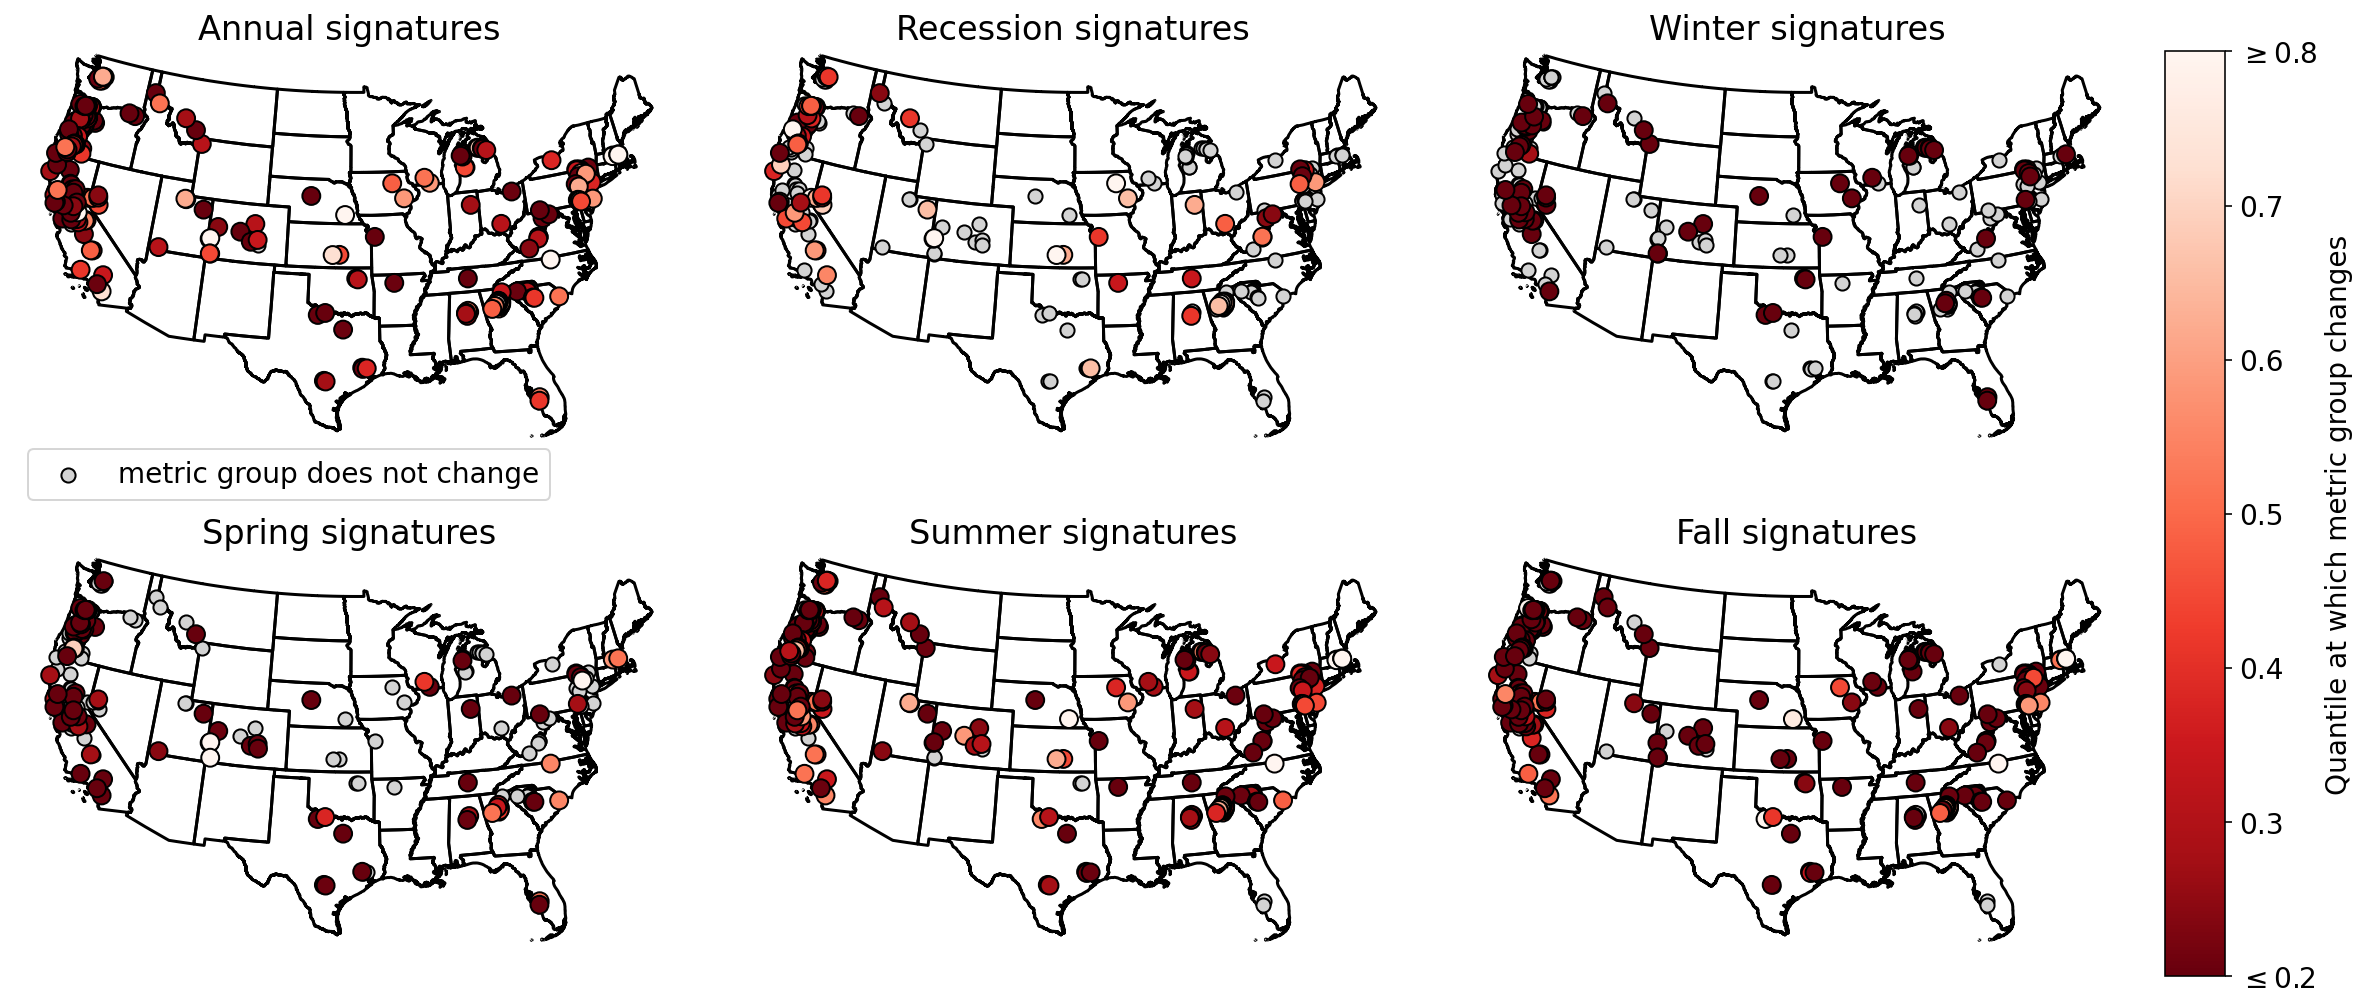

In [44]:
import matplotlib.gridspec as gridspec
import matplotlib
fig = plt.figure(figsize = (20,8.5))

gs = gridspec.GridSpec(2,31, figure=fig)

ax1 = fig.add_subplot(gs[0,:10])
ax2 = fig.add_subplot(gs[0,10:20])
ax3 = fig.add_subplot(gs[0,20:-1])
ax4 = fig.add_subplot(gs[1,:10])
ax5 = fig.add_subplot(gs[1,10:20])
ax6 = fig.add_subplot(gs[1,20:-1])
cax = fig.add_subplot(gs[:,-1])



axs = [ax1,ax2,ax3,ax4,ax5,ax6]
groups = [['daysbelow0.1year','totalbelow0.1year',
          'meanlowflowperiods','maxlowflowperiods'],
          ['recess7','recess14','recess30',
          'lowest7dayperyear','summer_lowest7dayperseason',
          'fall_lowest7dayperseason'],
          ['winter_daysbelow0.1seasonal',
          'winter_totalbelow0.1seasonal'],
          ['spring_daysbelow0.1seasonal',
          'spring_totalbelow0.1seasonal'],
          ['summer_daysbelow0.1seasonal',
          'summer_totalbelow0.1seasonal'],
          ['fall_totalbelow0.1seasonal',
          'fall_daysbelow0.1seasonal']
    
]

groupnames = ['Annual signatures',
             'Recession signatures',
             'Winter signatures',
             'Spring signatures',
             'Summer signatures',
             'Fall signatures']

change_thresh = 0.2
for i in range(6):
    ax = axs[i]
    group = groups[i]
    keepdata = ''
    for j in range(len(percentiles)):
        
        mean_change_sub1 = pdfs[j][groups[i]]
        for col in mean_change_sub1:
            mean_change_sub1[col] = np.where(mean_change_sub1[col]>change_thresh,
                                          1,0)
        mean_change_sub1['plot'] = np.where(mean_change_sub1.sum(axis=1)==len(mean_change_sub1.columns),
                                            percentiles[j]/100,np.nan)
        if len(keepdata)==0:
            keepdata = mean_change_sub1[['plot']]
        else:
            keepdata['plot'] = np.where(np.isnan(keepdata['plot']) ,
                                       mean_change_sub1['plot'],keepdata['plot'])
        

    mean_change_sub = keepdata.merge(gagesII[['site','LAT_GAGE','LNG_GAGE','geometry']],left_index=True,right_on='site')
    state_outline.to_crs('EPSG:5070').boundary.plot(ax=ax,edgecolor = 'k',zorder = -1)
    
    mean_change_sub = gpd.GeoDataFrame(
                    mean_change_sub, geometry=mean_change_sub.geometry)
    mean_change_sub['lng_albers'] = mean_change_sub.geometry.x
    mean_change_sub['lat_albers'] = mean_change_sub.geometry.y
    
    ax.scatter(mean_change_sub[np.isnan(mean_change_sub['plot'])].lng_albers,
               mean_change_sub[np.isnan(mean_change_sub['plot'])].lat_albers,
               c='lightgrey',
               edgecolor = 'k',
               s = 50,label = 'metric group does not change'
              )
    im = ax.scatter(mean_change_sub.lng_albers,
               mean_change_sub.lat_albers,
               c=mean_change_sub['plot'],
               edgecolor = 'k',
               s = 80,vmin = .2,vmax = .8,
                   cmap = matplotlib.cm.get_cmap('Reds_r'))
    
#     ax.set_xlim(-130,-65)
#     ax.set_ylim(22,51)
    ax.set_xlim(-0.26e7,0.25e7)
    ax.set_ylim(0e6,3.2e6)
    ax.set_title(groupnames[i])
    ax.axis('off')
ax1.legend(loc = 'lower left',
          bbox_to_anchor = (0,-.1),
          )

cbar = plt.colorbar(im,cax = cax)
cbar.set_label('Quantile at which metric group changes')#+metric)
cbar.set_ticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8])
cbar.set_ticklabels([r'$\leq$0.2',0.3,0.4,0.5,0.6,0.7,r'$\geq$0.8'])

plt.savefig('../Figures/map_Qmetrics_groups_bystate_'+notebook_pumpscenario+'.png',bbox_inches='tight')

In [45]:
print('grabbing annual data...')
m = flowmetrics_annual_allyears
m = m[(m.pumpscenario==notebook_pumpscenario) &
      (m.climscenario=='Dry')].drop(columns=['col','Unnamed: 0','pumpscenario','climscenario'])

print('grabbing seasonal data for...')
for season in ['winter','spring','summer','fall']:
    
    mseason = flowmetrics_seasonal_allyears
    mseason = mseason[(mseason.pumpscenario==notebook_pumpscenario) &
          (mseason.climscenario=='Dry') &
                     (mseason.season==season)].drop(columns=['col','Unnamed: 0','pumpscenario','climscenario','season'])

    mseason = mseason.rename(columns={col:season+'_'+col
                                       for col in mseason.columns})
    mseason = mseason.rename(columns={season+'_'+'year':'year',
                                     season+'_'+'site':'site'})
    mseason = mseason.reset_index().set_index(['site','year'])
    
    print(season)
    if season=='winter':
        mseasons = mseason.sort_index()
    else:
        mseason = mseason.sort_index()
        for col in mseason.drop(columns='index'):
            mseasons[col] = mseason[col]

m = m.reset_index().set_index('site')
m1 = m[m.year==1].groupby('site').median()
mseasons = mseasons.reset_index().set_index('site')
mseasons1 = mseasons[mseasons.year==1].groupby('site').median()

print('calculating yrchanges...')
yrchanges = []
for i in range(1,51):

    mnew = m[m.year==i].groupby('site').quantile(.5)
    cols = mnew.columns
    ychange = (mnew-m1)/m1
    
    
    mnew = mseasons[mseasons.year==i].groupby('site').quantile(.5)
    cols = mnew.columns
    ychange1 = (mnew-mseasons1)/mseasons1
    
    ychange = ychange.merge(ychange1,left_index=True,
              right_index=True).drop(columns=['index_x','index_y',
                                             'year_x','year_y'])
    
    yrchanges.append(ychange)

grabbing annual data...
grabbing seasonal data for...
winter
spring
summer
fall
calculating yrchanges...


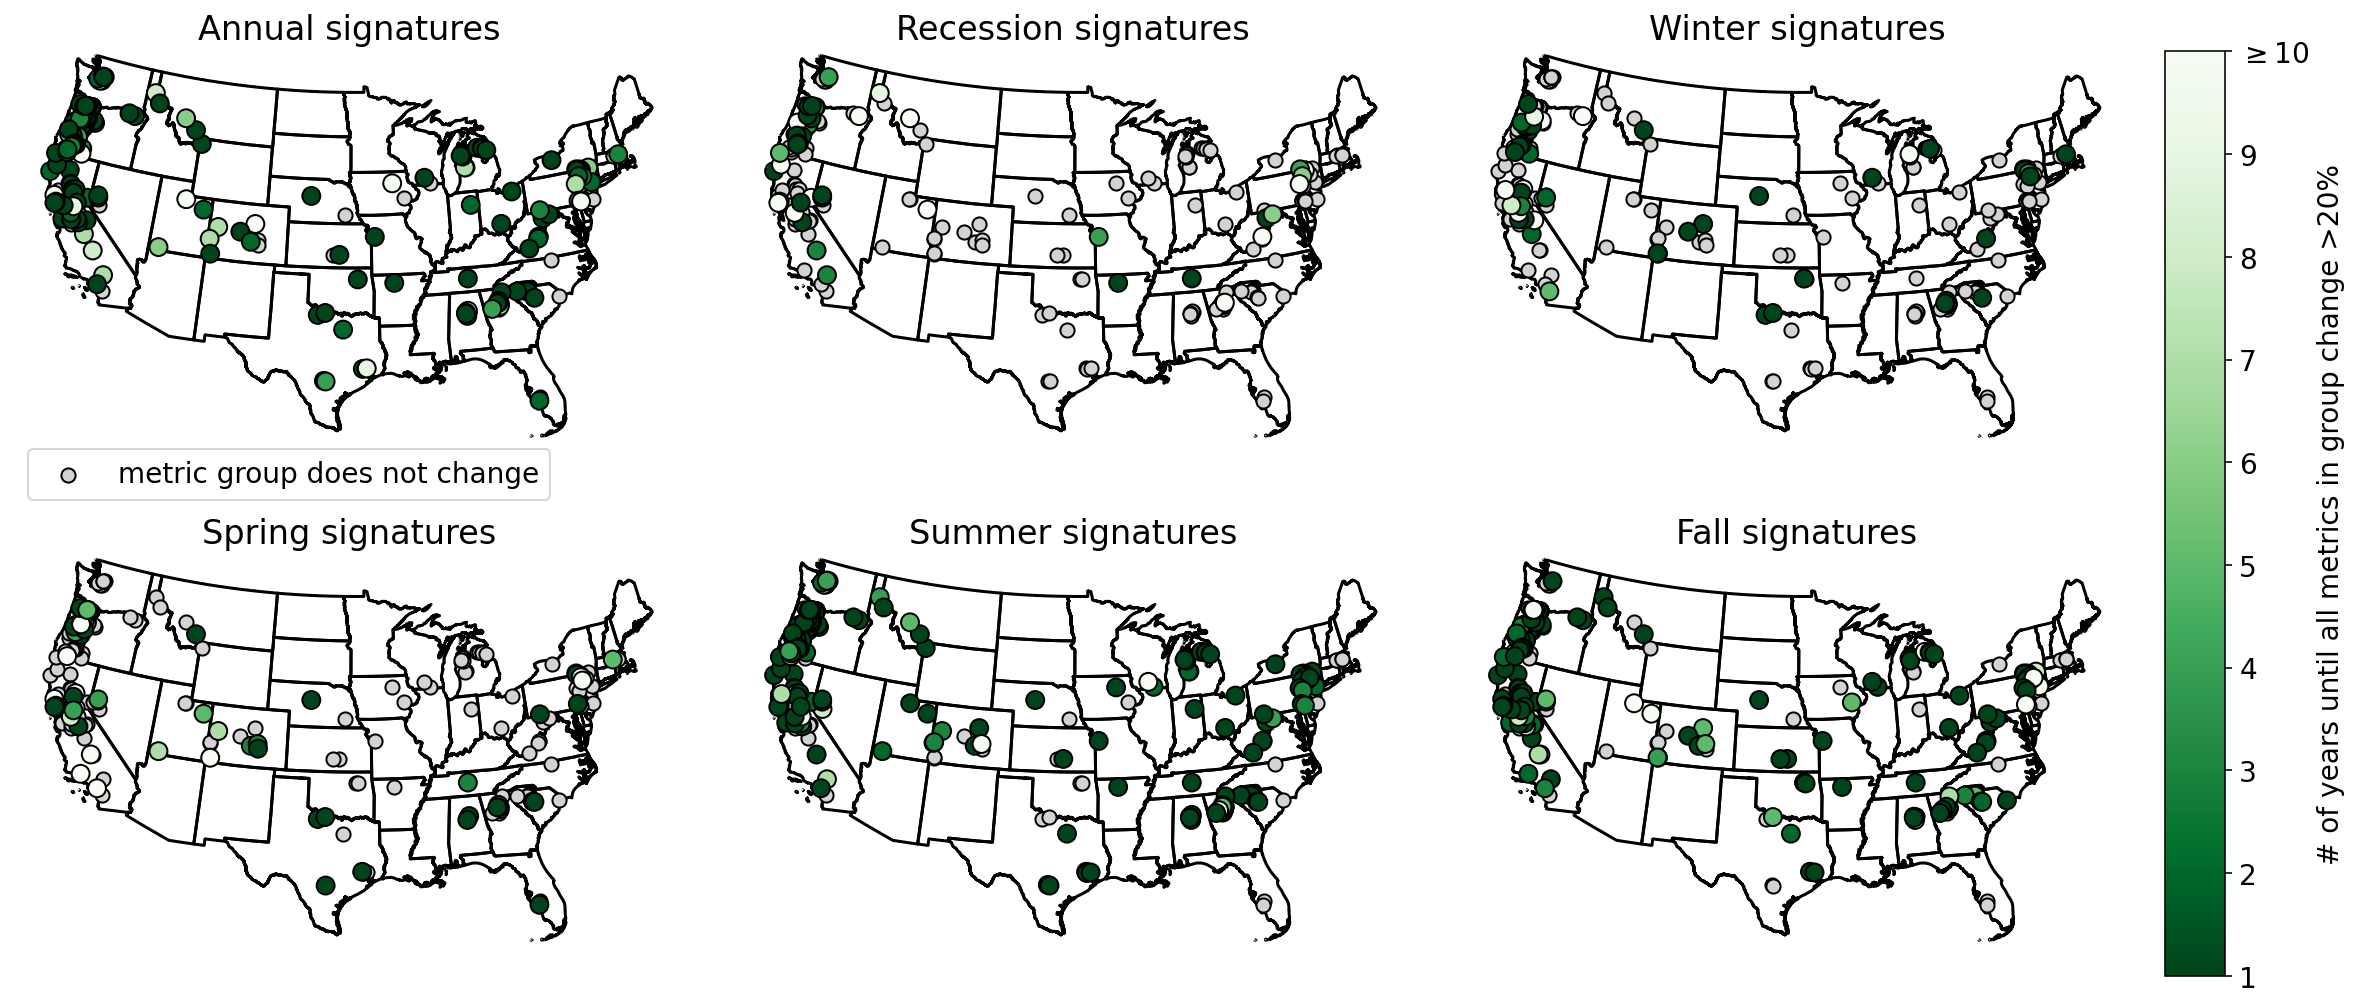

In [46]:


fig = plt.figure(figsize = (20,8.5))
gs = gridspec.GridSpec(2,31, figure=fig)

ax1 = fig.add_subplot(gs[0,:10])
ax2 = fig.add_subplot(gs[0,10:20])
ax3 = fig.add_subplot(gs[0,20:-1])
ax4 = fig.add_subplot(gs[1,:10])
ax5 = fig.add_subplot(gs[1,10:20])
ax6 = fig.add_subplot(gs[1,20:-1])
cax = fig.add_subplot(gs[:,-1])
axs = [ax1,ax2,ax3,ax4,ax5,ax6]


    
for i in range(6):
    ax = axs[i]
    group = groups[i]
    keepdata = ''


    for k in range(1,len(yrchanges)):
        mchange = yrchanges[k][group].abs().fillna(0)
        for col in mchange:
            mchange[col] = np.where(mchange[col]>change_thresh,1,0)
        mchange[k] = mchange.sum(axis = 1)
        mchange[k] = np.where(mchange[k]==len(group),1,0)
        if k==1:
            mchange1 = mchange[[k]]
        else:
            mchange1 = mchange1.merge(mchange[[k]],left_index=True,right_index=True)

    nochange = mchange1[mchange1[49]==0]
    dochange = mchange1[mchange1[40]==1]
    whenchange = [float(np.argwhere(~(dochange.iloc[j].values==0))[0])
                     for j in range(len(dochange))]
    whenchange = pd.DataFrame.from_dict({'site':dochange.index,
                                        'yr_to_change':whenchange})
    nochange = nochange.merge(gagesII[['site','LAT_GAGE','LNG_GAGE','geometry']],
                             left_index=True,right_on='site',how='left')

   
    mean_change_sub = whenchange.merge(gagesII[['site','LAT_GAGE','LNG_GAGE','geometry']],
                                       left_on='site',right_on='site',
                                      how='left')
    
    mean_change_sub = gpd.GeoDataFrame(
                    mean_change_sub, geometry=mean_change_sub.geometry)
    mean_change_sub['lng_albers'] = mean_change_sub.geometry.x
    mean_change_sub['lat_albers'] = mean_change_sub.geometry.y
    
    nochange = gpd.GeoDataFrame(
                    nochange, geometry=nochange.geometry)
    nochange['lng_albers'] = nochange.geometry.x
    nochange['lat_albers'] = nochange.geometry.y
    
    state_outline.to_crs('EPSG:5070').boundary.plot(ax=ax,edgecolor = 'k',zorder = -1)
    ax.scatter(nochange.lng_albers,
               nochange.lat_albers,
               c='lightgrey',
               edgecolor = 'k',
               s = 50,label = 'metric group does not change')
    
    im = ax.scatter(mean_change_sub.lng_albers,
               mean_change_sub.lat_albers,
               c=mean_change_sub['yr_to_change'],
               edgecolor = 'k',
               s = 80,vmin = 1,vmax = 10,
                   cmap = 'Greens_r')
    
    

    ax.set_xlim(-0.26e7,0.25e7)
    ax.set_ylim(0e6,3.2e6)
    ax.set_title(groupnames[i])
    ax.axis('off')

ax1.legend(loc = 'lower left',
          bbox_to_anchor = (0,-.1),
          )

    
cbar = plt.colorbar(im,cax = cax)
cbar.set_label('# of years until all metrics in group change >20%')#+metric)
cbar.set_ticks(list(range(1,11)))
cbar.set_ticklabels([1,2,3,4,5,6,7,8,9,r'$\geq10$'])

plt.savefig('../Figures/map_whenchange_Qmetrics_groups_'+notebook_pumpscenario+'.png',bbox_inches='tight')

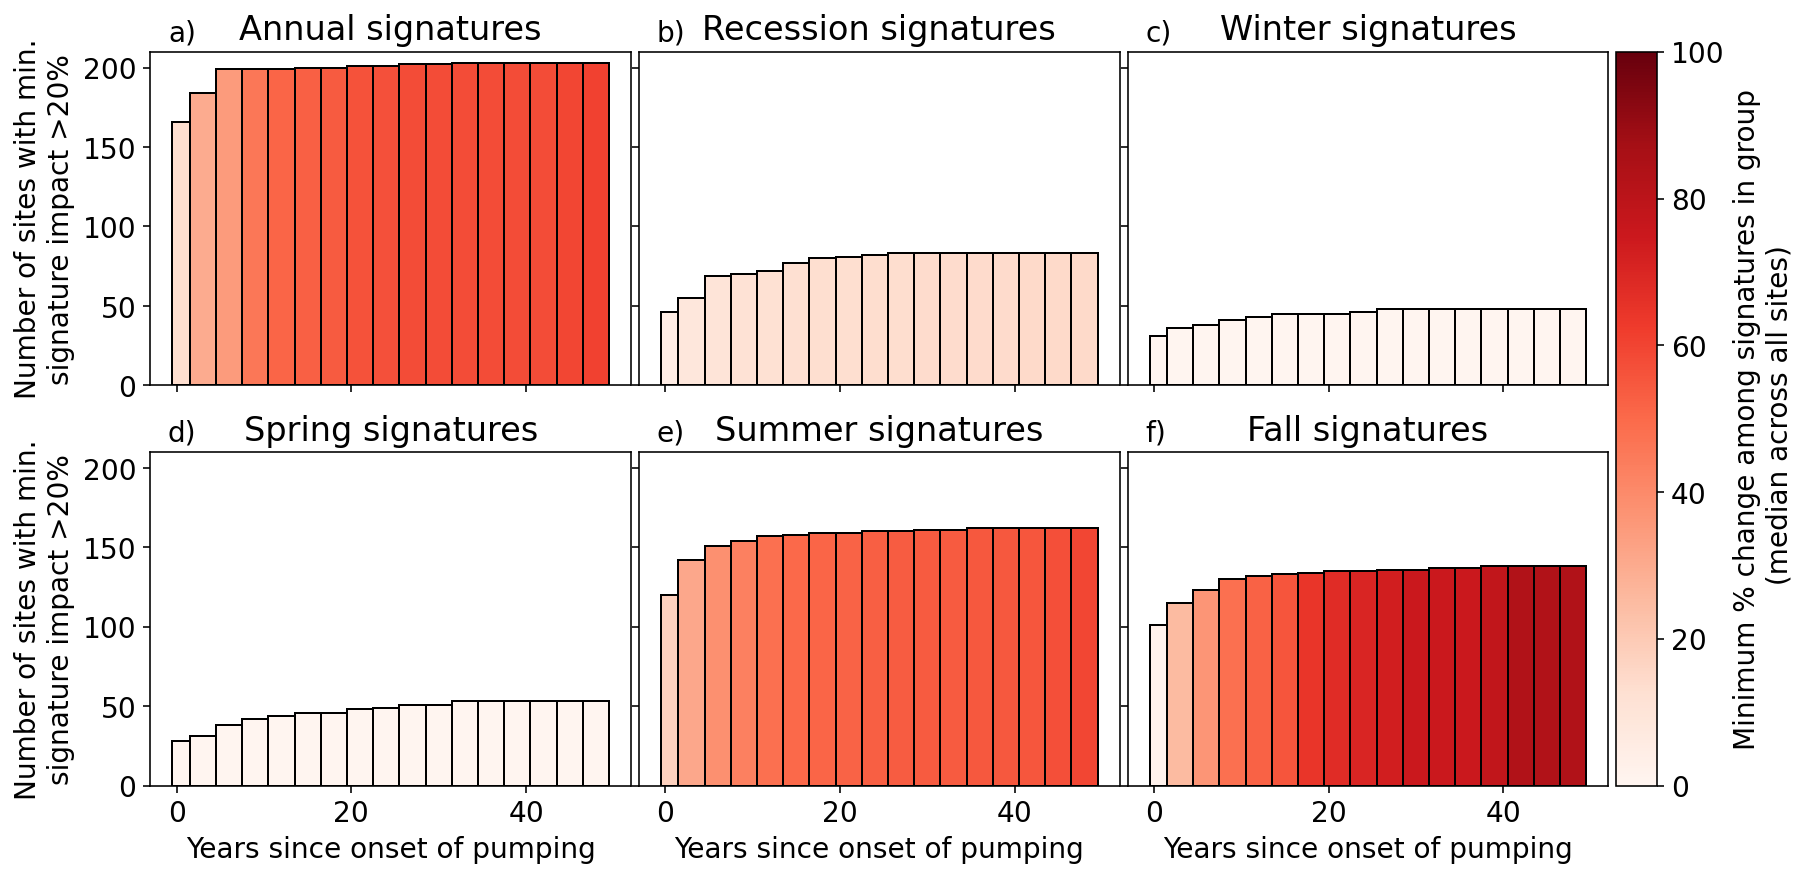

In [47]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import matplotlib as mpl


cmap = cm.Reds
norm = Normalize(vmin=0, vmax=100)

# fig = plt.figure(figsize = (19,8.5))
# gs = gridspec.GridSpec(2,31, figure=fig)

# fig,axs1 = plt.subplots(2,3,figsize = (20,8.5),
#                        sharex=True#,sharey=True
#                        )

fig = plt.figure(figsize = (13.5,6.75))
gs = gridspec.GridSpec(2,31, figure=fig)

ax1 = fig.add_subplot(gs[0,:10])
ax2 = fig.add_subplot(gs[0,10:20])
ax3 = fig.add_subplot(gs[0,20:-1])
ax4 = fig.add_subplot(gs[1,:10])
ax5 = fig.add_subplot(gs[1,10:20])
ax6 = fig.add_subplot(gs[1,20:-1])
cax = fig.add_subplot(gs[:,-1])
axs = [ax1,ax2,ax3,ax4,ax5,ax6]

# axs = [axs1[0][0],axs1[0][1],axs1[0][2],
#       axs1[1][0],axs1[1][1],axs1[1][2]]


    
for i in range(6):
    ax = axs[i]
    group = groups[i]
    keepdata = ''
    colors = []


    for k in range(1,len(yrchanges)):
        if k in [1]+list(range(0,50,3)):
            yr1 = (yrchanges[k][group].fillna(0).min(axis=1)*100).abs()
            yr1 = np.where(yr1>500,500,yr1)
            if i==3:
                yyy=yr1
            c1 = np.nanmedian(yr1)
            colors.append(c1)
            
            
        mchange = yrchanges[k][group].abs().fillna(0)
        for col in mchange:
            mchange[col] = np.where(mchange[col]>change_thresh,1,0)
        mchange[k] = mchange.sum(axis = 1)
        mchange[k] = np.where(mchange[k]>=2,1,0)
        if k==1:
            mchange1 = mchange[[k]]
        else:
            mchange1 = mchange1.merge(mchange[[k]],left_index=True,right_index=True)

    nochange = mchange1[mchange1[49]==0]
    dochange = mchange1[mchange1[40]==1]
    whenchange = [float(np.argwhere(~(dochange.iloc[j].values==0))[0])
                     for j in range(len(dochange))]
    whenchange = pd.DataFrame.from_dict({'site':dochange.index,
                                        'yr_to_change':whenchange})
    nochange = nochange.merge(gagesII[['site','LAT_GAGE','LNG_GAGE']],
                             left_index=True,right_on='site',how='left')
    j=0
    for k in range(1,len(yrchanges)):
        if k in [1]+list(range(0,50,3)):
            height_use = len(whenchange[whenchange.yr_to_change<=k])
            ax.bar(k,height_use,facecolor=cmap(norm(colors[j])),edgecolor = 'k',
                  width = 3)
            j+=1


    ax.set_title(groupnames[i])
    
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,)
cb1.set_label('Minimum % change among signatures in group\n (median across all sites)')

for ax in [ax1,ax4]:
    ax.set_ylabel('Number of sites')
for ax in [ax4,ax5,ax6]:
    ax.set_xlabel('Years until all signatures in group change')
    
ys = [132,20.6,38,30.5,145,120]
labels = ['a)','b)','c)','d)','e)','f)']
for i in range(len(axs)):
    ax = axs[i]
    ax.set_ylim(0,210)  
#     ax.set_xlim(0,50)
    ax.text(-1,217,labels[i])
    
for ax in [ax2,ax3,ax5,ax6]:
    ax.set_yticklabels([])
for ax in [ax3,ax1,ax2]:
    ax.set_xticklabels([])
for ax in [ax1,ax4]:
    ax.set_ylabel('Number of sites with min.\nsignature impact >20%')
for ax in [ax4,ax5,ax6]:
    ax.set_xlabel('Years since onset of pumping')
    
# gs.update(hspace = 0.05, wspace = 0.2)
plt.savefig('../Figures/map_whenchange_Qmetrics_groups_histos_'+notebook_pumpscenario+'.png',bbox_inches='tight')

['daysbelow0.1year', 'totalbelow0.1year', 'meanlowflowperiods', 'maxlowflowperiods'] 203 12
['recess7', 'recess14', 'recess30', 'lowest7dayperyear', 'summer_lowest7dayperseason', 'fall_lowest7dayperseason'] 84 131
['winter_daysbelow0.1seasonal', 'winter_totalbelow0.1seasonal'] 48 167
['spring_daysbelow0.1seasonal', 'spring_totalbelow0.1seasonal'] 54 161
['summer_daysbelow0.1seasonal', 'summer_totalbelow0.1seasonal'] 163 52
['fall_totalbelow0.1seasonal', 'fall_daysbelow0.1seasonal'] 139 76


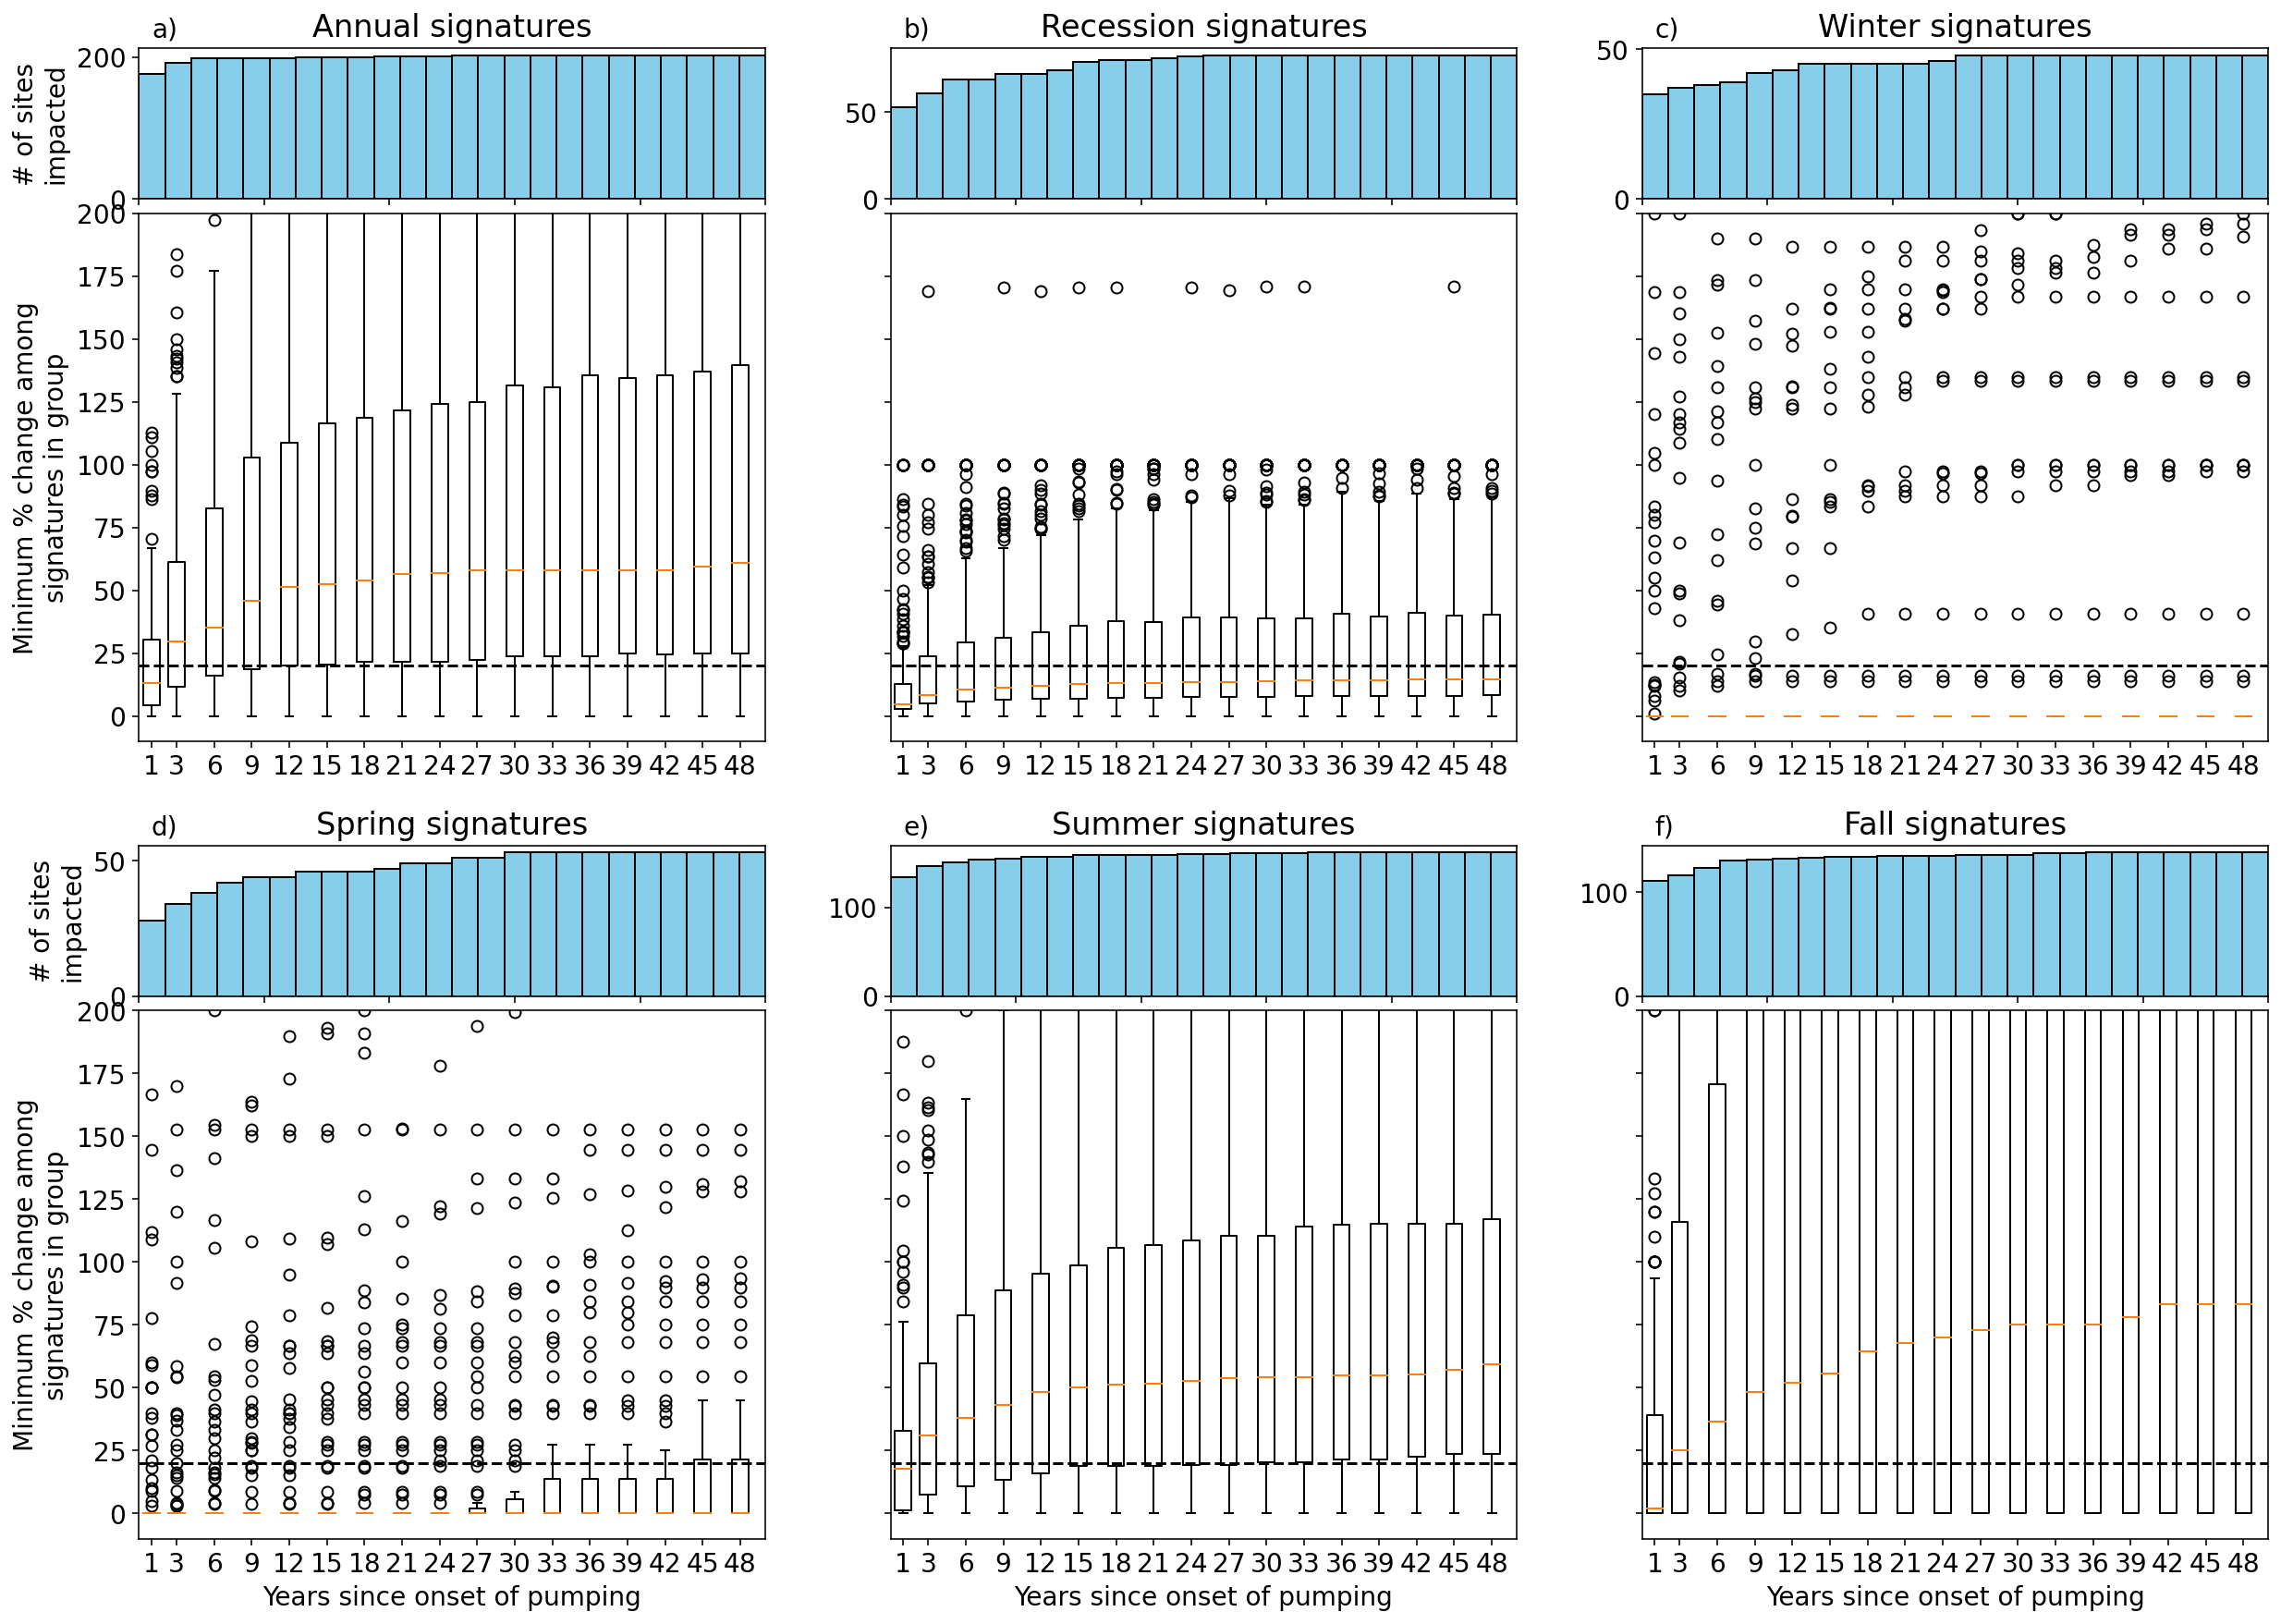

In [48]:

fig = plt.figure(figsize = (20,14))
gs = fig.add_gridspec(5,3,   height_ratios=(2, 7, 1, 2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)


ax0 = fig.add_subplot(gs[1, 0])
ax0_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax1 = fig.add_subplot(gs[1, 1])
ax1_histx = fig.add_subplot(gs[0, 1], sharex=ax)
ax2 = fig.add_subplot(gs[1, 2])
ax2_histx = fig.add_subplot(gs[0, 2], sharex=ax)

ax3 = fig.add_subplot(gs[4, 0])
ax3_histx = fig.add_subplot(gs[3, 0], sharex=ax)
ax4 = fig.add_subplot(gs[4, 1])
ax4_histx = fig.add_subplot(gs[3, 1], sharex=ax)
ax5 = fig.add_subplot(gs[4, 2])
ax5_histx = fig.add_subplot(gs[3, 2], sharex=ax)



axs = [ax0_histx,ax1_histx,ax2_histx,
      ax3_histx,ax4_histx,ax5_histx]
axs1 = [ax0,ax1,ax2,ax3,ax4,ax5]

    
for i in range(6):
    ax = axs[i]
    axx1 = axs1[i]
    group = groups[i]
    keepdata = ''

    for k in range(1,len(yrchanges)):
        if k in [1]+list(range(0,50,3)):
            yr1 = (yrchanges[k][group].fillna(0).min(axis=1)*100).abs()
            yr1 = np.where(yr1>500,500,yr1)
            if i==3:
                yyy=yr1
            axx1.boxplot(yr1,widths=[1.3],positions=[k])#,showfliers=False)
        
            
        
        mchange = yrchanges[k][group].abs().fillna(0)
        for col in mchange:
            mchange[col] = np.where(mchange[col]>change_thresh,1,0)
        mchange[k] = mchange.sum(axis = 1)
        mchange[k] = np.where(mchange[k]>=2,1,0)
        if k==1:
            mchange1 = mchange[[k]]
        else:
            mchange1 = mchange1.merge(mchange[[k]],left_index=True,right_index=True)

    nochange = mchange1[mchange1[49]==0]
    dochange = mchange1[mchange1[40]==1]
    whenchange = [float(np.argwhere(~(dochange.iloc[j].values==0))[0])
                     for j in range(len(dochange))]
    whenchange = pd.DataFrame.from_dict({'site':dochange.index,
                                        'yr_to_change':whenchange})
    nochange = nochange.merge(gagesII[['site','LAT_GAGE','LNG_GAGE']],
                             left_index=True,right_on='site',how='left')

   
    ax.hist(whenchange.yr_to_change,
           facecolor = 'skyblue',edgecolor = 'k',#density=True,
           bins = np.linspace(0,50,25),cumulative=True)
    
    
    
    ax.set_title(groupnames[i])
    print(group,mchange1[49].sum(),len(mchange1)-mchange1[49].sum())

for ax in [ax0_histx,ax3_histx]:
    ax.set_ylabel('# of sites\nimpacted')
for ax in [ax3,ax4,ax5]:
    ax.set_xlabel('Years since onset of pumping')
for ax in [ax0,ax3]:
    ax.set_ylabel('Minimum % change among\nsignatures in group')
    
ys = [270]*6#[1600,117,9200,2350,2100,3700]
labels = ['a)','b)','c)','d)','e)','f)']

for i in range(len(axs1)):
    ax = axs1[i]
    ax.axhline(20,ls='--',c='k')
    ax.set_ylim(-10,200)
    ax.text(1,ys[i],labels[i])
    ax.set_xlim(0,50)
for ax in axs:
    ax.set_xlim(0,50)
    ax.set_xticklabels([])
for ax in [ax1,ax2,ax4,ax5]:
    ax.set_yticklabels([])
    
gs.update(hspace = 0.05, wspace = 0.2)
    
plt.savefig('../Figures/map_whenchange_Qmetrics_groups_boxhistos_'+notebook_pumpscenario+'.png',bbox_inches='tight')

## Random forest model for where metrics change

In [60]:
gagesII_params = pd.read_csv('../Data/gagesII_basin_params1.csv')
gagesII_params = pd.concat([gagesII_params,
                           pd.read_csv('../Data/gagesII_basin_params2.csv')])

In [61]:
emptycols = []
for col in gagesII_params.columns:
    if len(gagesII_params[col].dropna())<9060:
        emptycols.append(col)
gagesII_params = gagesII_params.drop(columns=emptycols)
gagesII_params = gagesII_params.drop(columns='DRAIN_SQKM_x')

dropcols = ['STANAME','COUNTYNAME_SITE','FIPS_SITE','STATE',
           'AGGECOREGION', 'ADR_CITATION', 'SCREENING_COMMENTS',
            'BASIN_BOUNDARY_CONFIDENCE', 'HUC10_CHECK',
            'GEOL_REEDBUSH_DOM','GEOL_REEDBUSH_SITE','GEOL_HUNT_DOM_CODE',
            'GEOL_HUNT_DOM_DESC','GEOL_HUNT_SITE_CODE','REACHCODE','HUC02',
           'USDA_LRR_SITE']
gagesII_params = gagesII_params.drop(columns=dropcols)
gagesII_params = gagesII_params.drop(columns=[c for c in gagesII_params.columns
                                             if 'wy' in c])
gagesII_params['CLASS'] = np.where(gagesII_params.CLASS=='Non-ref',0,1)
gagesII_params['FLOW_PCT_EST_VALUES'] = np.where(gagesII_params['FLOW_PCT_EST_VALUES']=='ND',0,
                                         gagesII_params.FLOW_PCT_EST_VALUES)

KeyError: "['DRAIN_SQKM_x'] not found in axis"

In [ ]:
use_cols = ['LAT_CENT',
                'LONG_CENT',#'
            'PPTAVG_BASIN',
                'T_AVG_BASIN',
            'ELEV_MEAN_M_BASIN',
            'SNOW_PCT_PRECIP',
            'WD_BASIN',
                            'DRAIN_SQKM_y',
                            'STREAMS_KM_SQ_KM',
            'GEOL_REEDBUSH_DOM_PCT', 
            'PCT_6TH_ORDER_OR_MORE',
            'NDAMS_2009',
            'FRESHW_WITHDRAWAL', 'MINING92_PCT', 
            'PCT_IRRIG_AG',
            'SLOPE_PCT', 'ASPECT_DEGREES',
            'SANDAVE','SILTAVE','CLAYAVE','PERMAVE',
            'MINING92_PCT',
            'STRAHLER_MAX', 'MAINSTEM_SINUOUSITY',
            'BFI_AVE',
            'FORESTNLCD06', 'PLANTNLCD06', 'WATERNLCD06',
               'SNOWICENLCD06', 
            'DEVOPENNLCD06', 'DEVLOWNLCD06', 'DEVMEDNLCD06',
               'DEVHINLCD06', 'BARRENNLCD06', 'DECIDNLCD06', 'EVERGRNLCD06',
               'MIXEDFORNLCD06', 'SHRUBNLCD06', 'GRASSNLCD06', 'PASTURENLCD06',
               'CROPSNLCD06', 'WOODYWETNLCD06', 'EMERGWETNLCD06',
            'RAW_DIS_NEAREST_MAJ_DAM',
            'PERDUN','PERHOR',
            'CONTACT','TOPWET',
            'RUNAVE7100',
            'PET']

In [62]:
Xpred = gagesII_params[use_cols]
Xpred1 = Xpred.copy()
accuracy = []
i=0

for group in groups:
    print(group)
    
    
    for change_thresh in [0.2]:
        print(change_thresh)
        corr = correlates[group].fillna(0)
        for col in corr.columns:
            corr[col] = np.where(corr[col].abs()>=change_thresh,1,0)
        corr['binary'] = np.where(corr.sum(axis=1)>=2,1,0)

        # changedata['binary'] = np.where(changedata.perc_change_yr_50>50,2,changedata.binary)
        X1 = gagesII_params.merge(corr[['binary']],
                            left_on='STAID',right_on='site',how='right')
        X = X1[use_cols]
        # make data for random forest


        from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
        from sklearn.model_selection import train_test_split
        import math

        Xtrain, Xtest, ytrain, ytest = train_test_split(X, X1.binary,
                                                        random_state=42)

        def rmse(x,y): return math.sqrt(((x-y)**2).mean())

        def print_score(m,Xtrain=Xtrain,ytrain=ytrain,Xtest=Xtest,ytest=ytest):
            res = [rmse(m.predict(Xtrain), ytrain), rmse(m.predict(Xtest), ytest),
                        m.score(Xtrain, ytrain), m.score(Xtest, ytest)]
            if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
            print('RMSE on training set, RMSE on test set, accuracy with training set, accuracy with test set')
            print(res)
            return(res[-1])

        model = RandomForestClassifier()
        m = model.fit(Xtrain, ytrain)
        ypred = model.predict(X)
        r = print_score(model)
        
        accuracy.append(r)
        
        model = RandomForestClassifier()
        m = model.fit(X,X1.binary)
        ypred_allsites = model.predict(Xpred)
        Xpred1['predict_'+str(i)] = ypred_allsites
        i+=1


['daysbelow0.1year', 'totalbelow0.1year', 'meanlowflowperiods', 'maxlowflowperiods']
0.2
RMSE on training set, RMSE on test set, accuracy with training set, accuracy with test set
[0.0, 0.19245008972987526, 1.0, 0.9629629629629629]
['recess7', 'recess14', 'recess30', 'lowest7dayperyear', 'summer_lowest7dayperseason', 'fall_lowest7dayperseason']
0.2
RMSE on training set, RMSE on test set, accuracy with training set, accuracy with test set
[0.0, 0.5773502691896257, 1.0, 0.6666666666666666]
['winter_daysbelow0.1seasonal', 'winter_totalbelow0.1seasonal']
0.2
RMSE on training set, RMSE on test set, accuracy with training set, accuracy with test set
[0.0, 0.45133546692422, 1.0, 0.7962962962962963]
['spring_daysbelow0.1seasonal', 'spring_totalbelow0.1seasonal']
0.2
RMSE on training set, RMSE on test set, accuracy with training set, accuracy with test set
[0.0, 0.49065338146265813, 1.0, 0.7592592592592593]
['summer_daysbelow0.1seasonal', 'summer_totalbelow0.1seasonal']
0.2
RMSE on training set

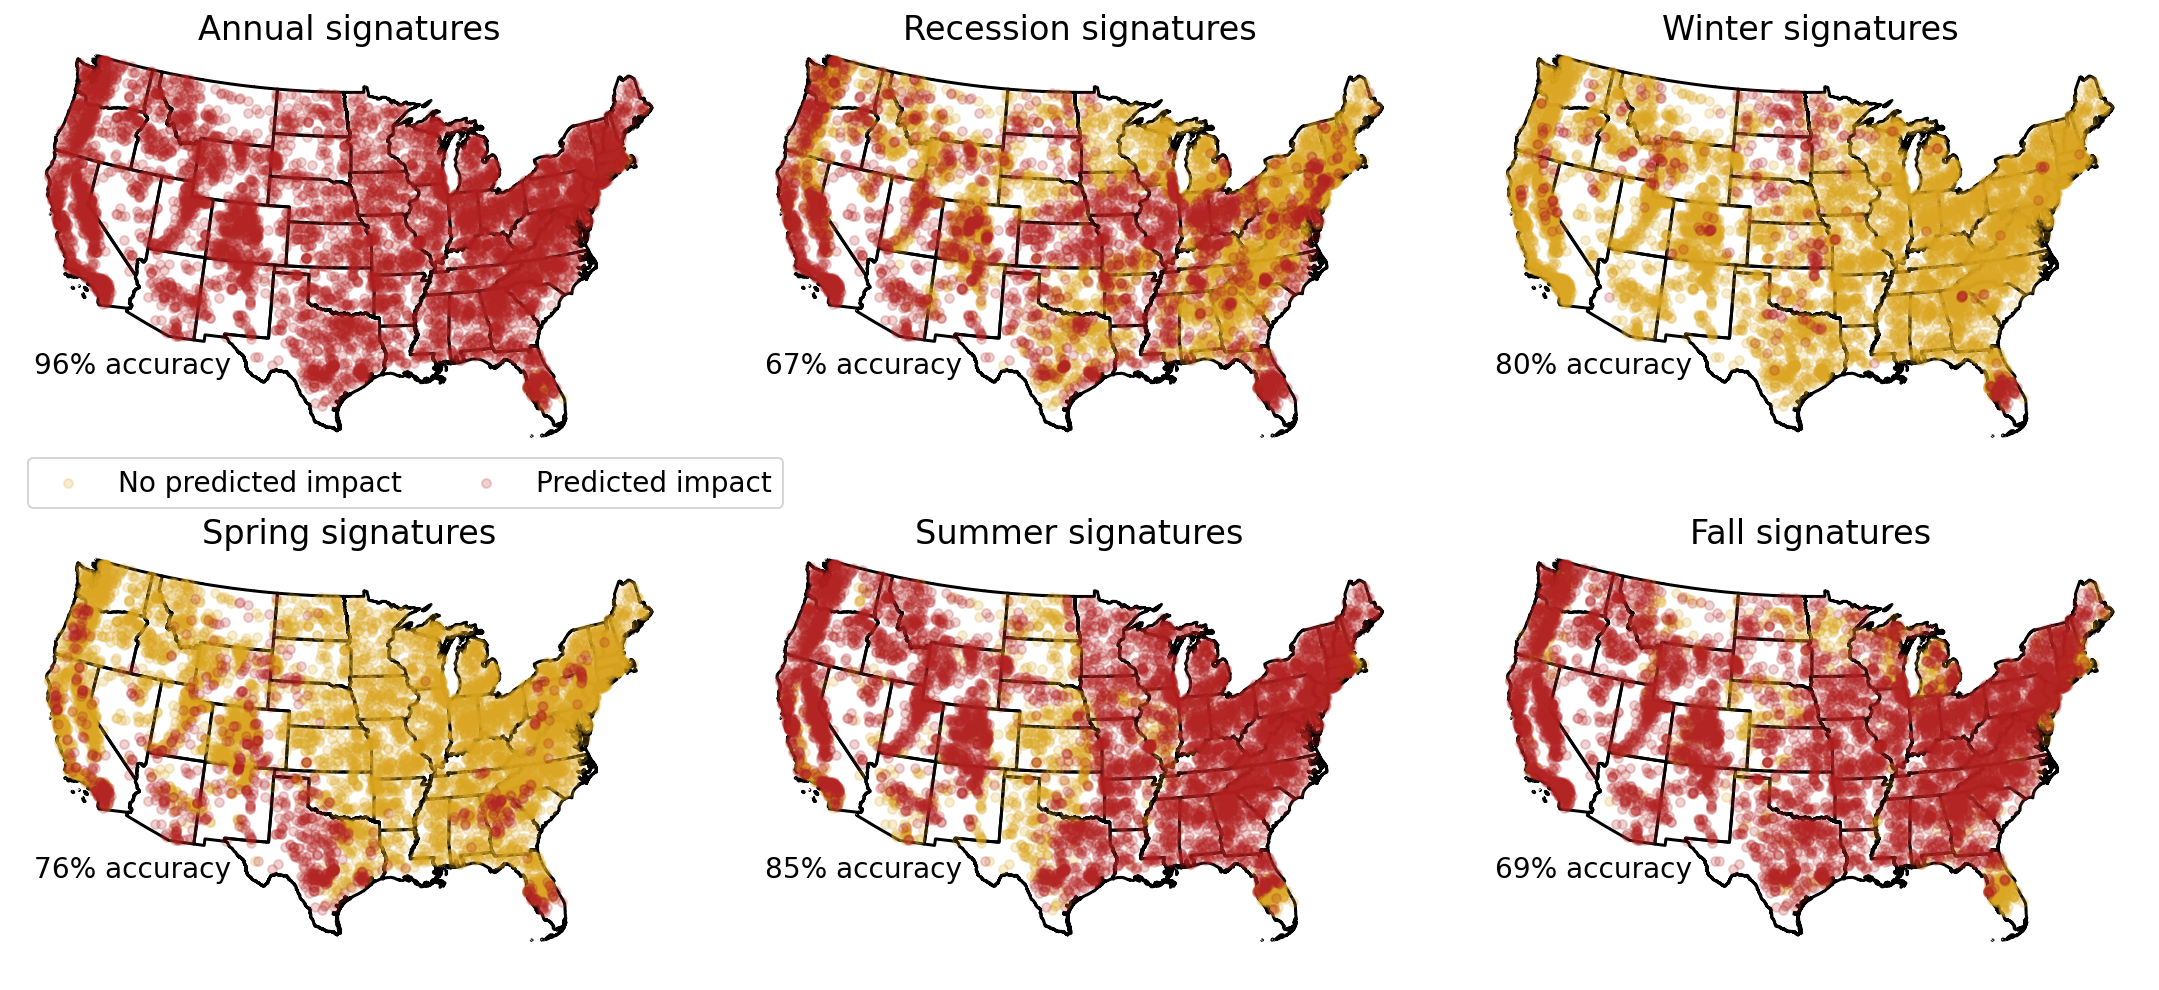

In [63]:


fig = plt.figure(figsize = (20,8.5))
gs = gridspec.GridSpec(2,31, figure=fig)

ax1 = fig.add_subplot(gs[0,:10])
ax2 = fig.add_subplot(gs[0,10:20])
ax3 = fig.add_subplot(gs[0,20:-1])
ax4 = fig.add_subplot(gs[1,:10])
ax5 = fig.add_subplot(gs[1,10:20])
ax6 = fig.add_subplot(gs[1,20:-1])

axs = [ax1,ax2,ax3,ax4,ax5,ax6]


    
for i in range(6):
    ax = axs[i]
    group = groups[i]
    keepdata = ''


    mean_change_sub = gpd.GeoDataFrame(
                    Xpred1, geometry=gpd.points_from_xy(Xpred1.LONG_CENT,Xpred1.LAT_CENT)).set_crs('EPSG:4326').to_crs('EPSG:5070')
    mean_change_sub['lng_albers'] = mean_change_sub.geometry.x
    mean_change_sub['lat_albers'] = mean_change_sub.geometry.y
    
    nochange = mean_change_sub[mean_change_sub['predict_'+str(i)]==0]
    dochange = mean_change_sub[mean_change_sub['predict_'+str(i)]==1]
    
    
    state_outline.to_crs('EPSG:5070').boundary.plot(ax=ax,edgecolor = 'k',zorder = -1)

    
    ax.scatter(nochange.lng_albers,
               nochange.lat_albers,
               c='goldenrod',
               alpha=0.2,
               s = 20,label='No predicted impact')
    
    ax.scatter(dochange.lng_albers,
               dochange.lat_albers,
               c='firebrick',
               s = 20,
               alpha = 0.2,
               label='Predicted impact')
    
    

    ax.set_xlim(-0.26e7,0.25e7)
    ax.text(-.245e7,.75e6,'{a:2.0f}% accuracy'.format(a=accuracy[i]*100))
    ax.set_ylim(0e6,3.2e6)
    ax.set_title(groupnames[i])
    ax.axis('off')

ax1.legend(loc = 'lower left',ncol=2,
          bbox_to_anchor = (0,-.12),
          )

gs.update(wspace=0.8)

    

plt.savefig('../Figures/map_rf_predict_'+notebook_pumpscenario+'.png',bbox_inches='tight')

In [314]:
Xpred1[['predict_'+str(i) for i in range(6)]].sum(axis=0)/len(Xpred1)*100

predict_0    98.698577
predict_1    41.083048
predict_2     5.238778
predict_3    10.047425
predict_4    85.585089
predict_5    86.147568
dtype: float64

In [64]:
import rasterio
from rasterio.plot import show
src = rasterio.open('../Data/gridmet_P_div_PET_mean_annual_1981_2020_16km_albers.tif')
from rasterio.mask import mask
src, _ = mask(src, state_outline.to_crs('EPSG:5070').geometry, invert=False)

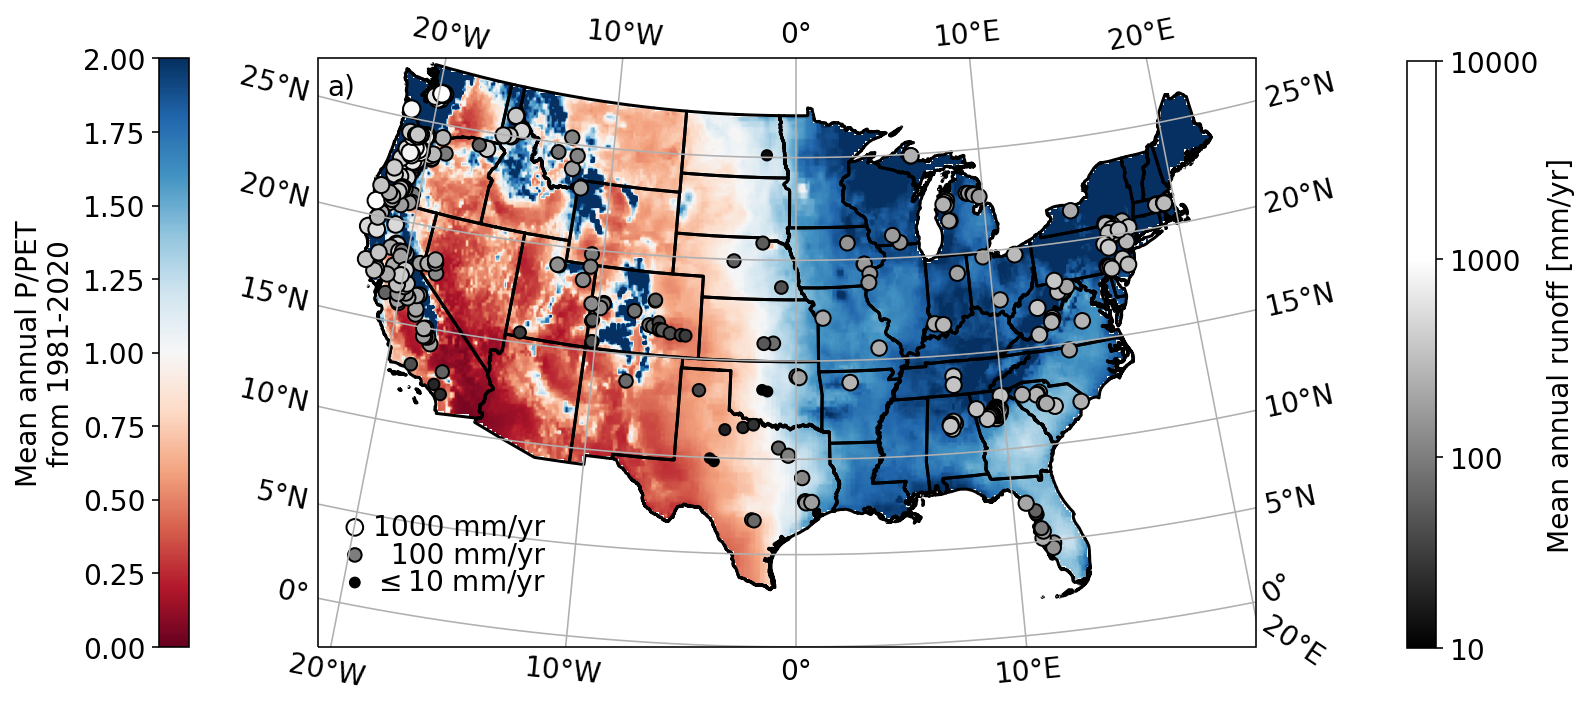

In [65]:
import cartopy.crs as ccrs

fig,ax = plt.subplots(1,figsize = (10,5),
                      subplot_kw={'projection': ccrs.AlbersEqualArea()})

cm = 'gray'

ai = np.where(src<0,np.nan,src)

cmap = matplotlib.cm.RdBu
cmap.set_bad('white',1.)
show(ai,cmap=cmap,
          vmin = 0.0, vmax = 2,zorder = -2,ax=ax,
    transform=_)

im = ax.imshow(ai[0],cmap='RdBu',
          vmin = 0.0, vmax = 2,zorder = -2)
cb1 = plt.colorbar(im,location='left')
cb1.set_label('Mean annual P/PET\nfrom 1981-2020')

state_outline.to_crs('EPSG:5070').boundary.plot(ax=ax,edgecolor = 'k',zorder = -1)


g = gagesII.copy().to_crs('EPSG:5070')
g['STAID'] = g.STAID.astype('int')
g = g.merge(gagesII_params[['STAID','RUNAVE7100']],
             right_on='STAID',left_on='STAID').to_crs(epsg=4326)

g['plotsize'] = np.where(g.RUNAVE7100>=10,g.RUNAVE7100+1,11)
ax.scatter(g.to_crs('EPSG:5070').geometry.x,g.to_crs('EPSG:5070').geometry.y,
          s=np.log(g.plotsize)*10,
                        edgecolor = 'k', c = np.log(g.plotsize),
                        cmap = cm,vmin = np.log(11))
heights = [.35e6,.5e6,.65e6]#[31,28.5,26,23.5]
vols = np.array([10,100,1000])
lables = ['$\leq$10','  100','1000']
cb = ax.scatter(#[-128]*4,
                [-.24e7]*3,heights,s=np.log(vols+1)*10,
                        edgecolor = 'k', c = np.log(vols+1),
                        cmap = cm,vmin = np.log(11))

cbaxes = fig.add_axes([1.005, 0.09, 0.02, 0.815]) 
cbar = plt.colorbar(cb,cax=cbaxes)
cbar.set_label('Mean annual runoff [mm/yr]')
cbar.set_ticks([np.log(a+1) for a in [10,100,1000,10000]])
cbar.set_ticklabels([10,100,1000,10000])

for i in range(3):
    ax.text(#-126,
            -.23e7,heights[i],lables[i]+' mm/yr',va='center')

ax.set_xlim(-0.26e7,0.25e7)
ax.set_ylim(0e6,3.2e6)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

fig.tight_layout()

ax.text(-.255e7,3.e6,'a)')

plt.savefig('../Figures/sitemap.png',format='png',dpi=300,
           bbox_inches='tight')



In [400]:
# ·         GAGE_ID = gage ID

# ·         iter = iteration, #1 to 100

# ·         dist_m = well-stream distance used in that iteration [m]

# ·         S = Storativity used in that iteration [-]

# ·         Tr_m2d = transmissivity used in that iteration [m2/d]

# ·         eq_yrs_constant = time to equilibration under constant pumping scenario.

# o    values of 99 indicate that equilibrium was not reached in the 50 year simulation.

# ·         eq_yrs_seasonal = time to equilibration under periodic pumping scenario.

# o    values of 99 indicate that equilibrium was not reached in the 50 year simulation.

# ·         Qf_100yrs_constant = depletion fraction at end of 50 year simulation (not 100 yrs, bad column name) in constant pumping scenario

url = 'https://raw.githubusercontent.com/lapidesd/streamflow_depletion_metrics_replacement/main/Data/depletion/DepletionFraction_TimeToEquilibrium.csv'
time_to_eq = pd.read_csv(url)
time_to_eq = time_to_eq[time_to_eq.eq_yrs_seasonal<99]

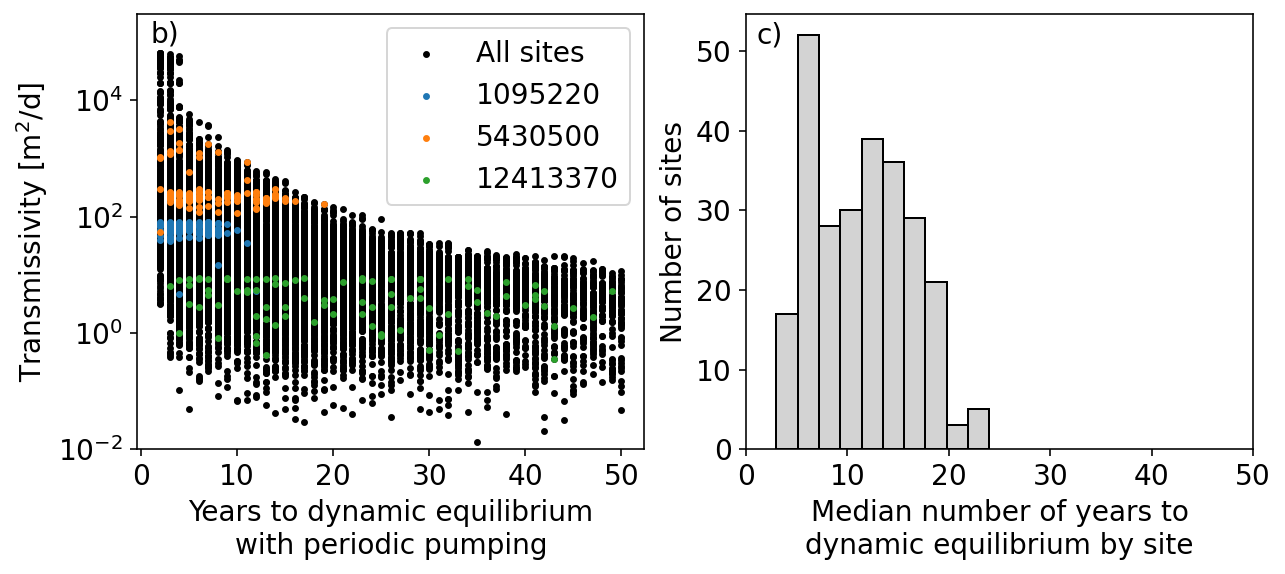

In [471]:
fig,axs = plt.subplots(1,2, figsize = (10,4.))

ax = axs[0]
yrs_to_eq_seas = time_to_eq.groupby('GAGE_ID').median().eq_yrs_seasonal
ax.scatter(time_to_eq.eq_yrs_seasonal,time_to_eq.Tr_m2d,
          c='k',s=6,label = 'All sites')#time_to_eq.GAGE_ID, s=2, )
for i in [0,100,200,]:
    gage = time_to_eq.GAGE_ID.unique()[i]
    ax.scatter(time_to_eq[time_to_eq.GAGE_ID==gage].eq_yrs_seasonal,
           time_to_eq[time_to_eq.GAGE_ID==gage].Tr_m2d,
               label = str(gage),
          s=6)#time_to_eq.GAGE_ID, s=2, )
ax.set_yscale('log')
ax.set_ylabel('Transmissivity [m$^2$/d]')
ax.set_xlabel('Years to dynamic equilibrium\nwith periodic pumping')
ax.set_ylim(.1e-1,3e5)
ax.legend()
ax.text(1,1e5,'b)')

ax = axs[1]
ax.hist(yrs_to_eq_seas,facecolor = 'lightgrey',
       edgecolor = 'k')
ax.set_xlabel('Median number of years to\ndynamic equilibrium by site')
ax.set_ylabel('Number of sites')
ax.text(1,51,'c)')
ax.set_xlim(0,50)

plt.savefig('../Figures/yr_to_eq_plots.png',format='png',dpi=300,
           bbox_inches='tight')